# Group 4 / Lab 2: Classification - Credit Card Default

By Heidi Nguyen


<a id="top"></a>

# Table of Contents

- [Abstract](#ABS)

- [Data Preparation Part 1](#DPP1)
    - [Raw Data](#RD)

    - [Data Meaning and Type of Data](#DM)

    - [Additional Data Processing: One hot encoding of categorical variables](#OHC)

- [Data Preparation Part 2](#DPP2)
    
    - [Final Data Meaning and Type of Data](#DM2)

- [Modeling and Evaluation 1](#MODEL1)

- [Modeling and Evaluation 2](#MODEL2)

- [Modeling and Evaluation 3](#MODEL3)

    - [TASK 1: 'default' classification](#Task1)
        
         - [Training and Testing Split - Task 1](#TT1)
        
         - [KNN classification](#KNN1)
         
         - [Forest Tree](#FT1)
         
         - [Logistic Regression](#LR1)

    - [TASK 2: 'LIMIT_BAL_250k' classification](#Task2)
        
         - [Training and Testing Split - Task 2](#TT2)

         - [KNN classification](#KNN2)
         
         - [Forest Tree](#FT2)
         
         - [Logistic Regression](#LR2)

- [Modeling and Evaluation 4](#MODEL4)     
         
- [Modeling and Evaluation 5](#MODEL5)     
         
- [Modeling and Evaluation 6](#MODEL6)    

- [Deployment](#DEP)         

- [Exceptional Work: Grid Search CV](#EX)

- [Reference](#ref)

<a id="ABS"></a>

# Abstract:

In this notebook, we will be looking at the classifications default and if credit limit is greater than 250k NT. We will investigate what kind of model and its best parameters we can use to predict these classifications of our dataset. We will be analyzing our data using logistic regression, k nearest neighbors, and random forest in scikit-learn. We will be evaluating the output of these methods based on their accuracy, precision, recall, and F-measure. We will compare these methods using baseline dumb model for accuracy and ROC for overall performance.

We will be using the cleaned credit default data set. 

 <a href="#top">Back to top</a>

<div id='DPP1'/>

# Data Preparation Part 1:

<div id='RD'/>
## Raw Data Content:

Dataset Information:<br/>
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. Dataset downloaded at: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

There are 25 variables. See below 'Data Type Image' for more detail.  

 <a href="#top">Back to top</a>

<div id='DM'/>

## Current Data Meaning and Type of Data:

All data verification and data cleaning are given in Lab 1.

 <a href="#top">Back to top</a>


In [1]:
# Libraries

# generals 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from collections import Counter
import time

# sklearn - for classification 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline

# for interactive tool 
from ipywidgets import widgets as wd

%matplotlib inline

In [2]:
# read in the cleaned credit card csv file and save it as a dataframe - df
df = pd.read_csv('/Volumes/NO NAME/Data Science/2017-0829 MSDS 7331 Data Mining/Unit 3 - Lab 1/cleaned_credit_default.csv')
# look at the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
Unnamed: 0             30000 non-null int64
ID                     30000 non-null int64
LIMIT_BAL              30000 non-null float64
SEX                    30000 non-null int64
EDUCATION              30000 non-null int64
MARRIAGE               30000 non-null int64
AGE                    30000 non-null int64
Sept_Payment_Status    30000 non-null int64
Aug_Payment_Status     30000 non-null int64
Jul_Payment_Status     30000 non-null int64
Jun_Payment_Status     30000 non-null int64
May_Payment_Status     30000 non-null int64
Apr_Payment_Status     30000 non-null int64
Sept_Bill              30000 non-null float64
Aug_Bill               30000 non-null float64
Jul_Bill               30000 non-null float64
Jun_Bill               30000 non-null float64
May_Bill               30000 non-null float64
Apr_Bill               30000 non-null float64
Sept_Amount_Paid       30000 non-null flo

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_Payment_Status,Aug_Payment_Status,Jul_Payment_Status,...,Jun_Bill,May_Bill,Apr_Bill,Sept_Amount_Paid,Aug_Amount_Paid,Jul_Amount_Paid,Jun_Amount_Paid,May_Amount_Paid,Apr_Amount_Paid,default
0,0,1,20000.0,2,2,1,24,2,2,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,1,2,120000.0,2,2,2,26,-1,2,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,2,3,90000.0,2,2,2,34,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,3,4,50000.0,2,2,1,37,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,4,5,50000.0,1,2,1,57,-1,0,-1,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


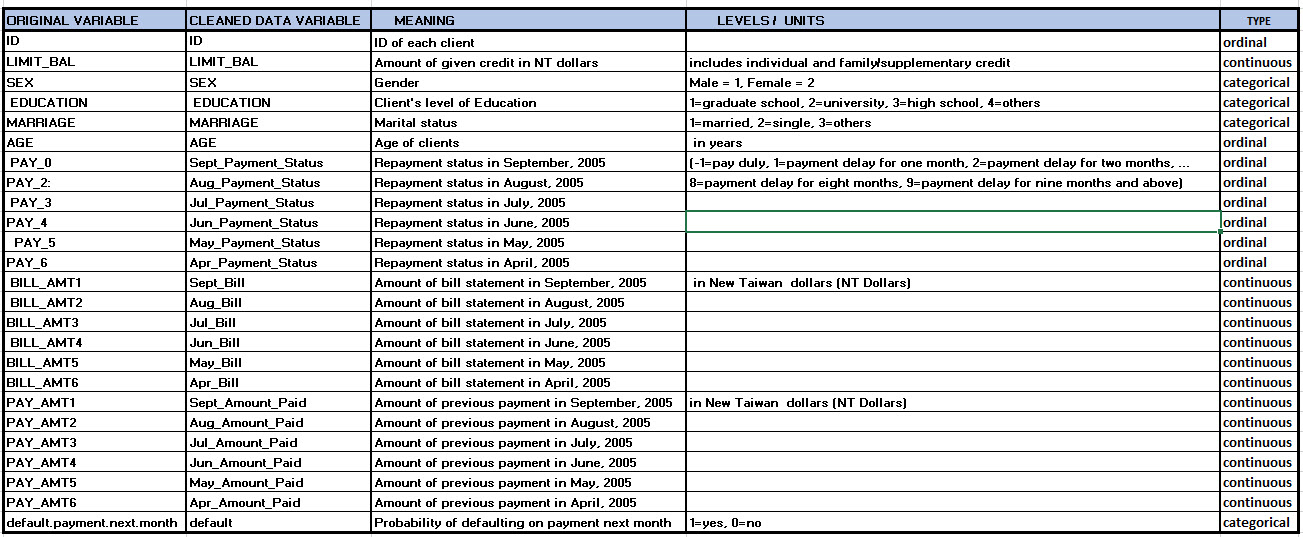

In [3]:
# Data Type Image. 
from IPython.display import Image
Image(filename='/Volumes/NO NAME/Data Science/2017-0829 MSDS 7331 Data Mining/Unit 5b - Mini Lab/Data Meaning Table.jpg')

**Proper variable representations: all the variables already have the proper types due to the data processing and cleaning that were done in Lab 1.**

In [4]:
# Remove attributes that just aren't useful for us
df.drop(df.columns[[0, 1]], axis=1, inplace = True) 

# creating new dataframe. Keeping original seperate.
df_copy = df.copy()
df_copy.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_Payment_Status,Aug_Payment_Status,Jul_Payment_Status,Jun_Payment_Status,May_Payment_Status,...,Jun_Bill,May_Bill,Apr_Bill,Sept_Amount_Paid,Aug_Amount_Paid,Jul_Amount_Paid,Jun_Amount_Paid,May_Amount_Paid,Apr_Amount_Paid,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<div id='OHC'/>
## Additional Data Processing: One hot encoding of categorical variables
 <a href="#top">Back to top</a>

Now let's look a little further at each of the categorical variables. Those are 'MARRIAGE', 'EDUCATION, 'SEX', and 'default' status.

In [5]:
# NOTE: calling describe when not all the data is categorical will cause the 
# categorical variables to be removed
df_copy[['SEX','EDUCATION','MARRIAGE']].describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
SEX,30000.0,1.603733,0.489129,1.0,1.0,2.0,2.0,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.0,2.0,2.0,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.0,2.0,2.0,3.0


In [6]:
#check each for data frequency and possible invalid data of ordinal and categorical variables
print dict(Counter(df_copy.SEX))
print dict(Counter(df_copy.EDUCATION))
print dict(Counter(df_copy.MARRIAGE)) 
print dict(Counter(df_copy.default)) 
print dict(Counter(df_copy.LIMIT_BAL)) 

{1: 11888, 2: 18112}
{1: 10585, 2: 14030, 3: 4917, 4: 468}
{1: 13659, 2: 15964, 3: 377}
{0: 23364, 1: 6636}
{160000.0: 694, 640000.0: 7, 327680.0: 1, 630000.0: 7, 10000.0: 493, 320000.0: 312, 530000.0: 10, 740000.0: 2, 20000.0: 1976, 270000.0: 238, 430000.0: 83, 120000.0: 726, 330000.0: 173, 30000.0: 1610, 750000.0: 4, 230000.0: 737, 370000.0: 71, 440000.0: 83, 650000.0: 3, 200000.0: 1528, 540000.0: 6, 390000.0: 174, 130000.0: 729, 340000.0: 217, 760000.0: 1, 210000.0: 730, 240000.0: 619, 450000.0: 161, 660000.0: 3, 140000.0: 749, 350000.0: 231, 380000.0: 156, 570000.0: 8, 40000.0: 230, 250000.0: 350, 460000.0: 80, 670000.0: 3, 550000.0: 21, 150000.0: 1110, 360000.0: 881, 220000.0: 469, 780000.0: 2, 560000.0: 10, 1000000.0: 1, 260000.0: 521, 680000.0: 4, 730000.0: 2, 60000.0: 825, 480000.0: 79, 580000.0: 11, 70000.0: 731, 170000.0: 532, 590000.0: 6, 800000.0: 2, 110000.0: 588, 490000.0: 64, 700000.0: 8, 180000.0: 995, 280000.0: 493, 420000.0: 168, 690000.0: 1, 600000.0: 16, 80000.0: 15

In [7]:
# look at LIMIT_BAL statistics
print df_copy.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


Because the Sex and default attributes are already binary, there is no need to encode it using OneHotEncoding. We can just convert Female to be 0, while Male is still 1. However, we will need to transform the EDUCATION and MARRIAGE attributes to take on the four and three different values--one for each possible variable outcome.<br/>
For the ordinal variables AGE, we will create AGE_range and label them in numerical order.<br/>
AGE_range and label them in numerical order.<br/>
For the continuous variables LIMIT_BAL, we will create a binary LIMIT_BAL_250k that is 0 if a customer has credit limit lower or equal than 250k and 1 if a customer has credit limit greater than 250k. <br/>
Also, notice that our data is an imbalance, with 23364 data with 0-no default vs. 6636 data with 1-default. 



In [8]:
# creates a new variable AGE_range
df_copy['AGE_range'] = pd.cut(df_copy.AGE,[20, 30, 40, 50, 60, 70, 80],6,labels=[0,1,2,3,4,5]) 
df_copy.AGE_range = df_copy.AGE_range.astype(np.int) # this must be int type, otherwise you will get error when build the regression model later


In [9]:
# replace the current LIMIT_BAL atribute with binary LIMIT_BAL_250k variable; 1 for LIMIT_BAL > 250000, 0 for LIMIT_BAL <= 250000
df_copy['LIMIT_BAL_250k'] = df_copy.LIMIT_BAL > 250000
df_copy.LIMIT_BAL_250k = df_copy.LIMIT_BAL_250k.astype(np.int)


In [10]:
# perform one-hot encoding of the categorical data EDUCATION:
tmp_df = pd.get_dummies(df_copy.EDUCATION,prefix='EDUCATION')
df_copy = pd.concat((df_copy,tmp_df),axis=1) # add back into the dataframe

# perform one-hot encoding of the categorical data MARRIAGE:
tmp_df_mrg = pd.get_dummies(df_copy.MARRIAGE,prefix='MARRIAGE')
df_copy = pd.concat((df_copy,tmp_df_mrg),axis=1) # add back into the dataframe

# replace the current Sex atribute with something slightly more intuitive and readable
df_copy['IsMale'] = df_copy.SEX== 1
df_copy.IsMale = df_copy.IsMale.astype(np.int)

# look at the data
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
LIMIT_BAL              30000 non-null float64
SEX                    30000 non-null int64
EDUCATION              30000 non-null int64
MARRIAGE               30000 non-null int64
AGE                    30000 non-null int64
Sept_Payment_Status    30000 non-null int64
Aug_Payment_Status     30000 non-null int64
Jul_Payment_Status     30000 non-null int64
Jun_Payment_Status     30000 non-null int64
May_Payment_Status     30000 non-null int64
Apr_Payment_Status     30000 non-null int64
Sept_Bill              30000 non-null float64
Aug_Bill               30000 non-null float64
Jul_Bill               30000 non-null float64
Jun_Bill               30000 non-null float64
May_Bill               30000 non-null float64
Apr_Bill               30000 non-null float64
Sept_Amount_Paid       30000 non-null float64
Aug_Amount_Paid        30000 non-null float64
Jul_Amount_Paid        30000 non-null

We will get rid of those original attributes that got replaced by one hot coding and bucketing to prevent data leakage 

In [11]:
# Now let's clean up the dataset 
if 'SEX' in df_copy:
    del df_copy['SEX'] # if 'SEX' column still exists, delete it (as we created an IsMale column)
# get rid of the original category as it is now one-hot encoded
if 'EDUCATION' in df_copy:    
    del df_copy['EDUCATION'] # get rid of the original EDUCATION category 
if 'MARRIAGE' in df_copy:    
    del df_copy['MARRIAGE'] # get rid of the original MARRIAGE category 
if 'LIMIT_BAL' in df_copy:    
    del df_copy['LIMIT_BAL'] # get rid of the original LIMIT_BAL attribute prevent data leakage 
if 'AGE' in df_copy:    
    del df_copy['AGE'] # get rid of the original AGE attribute to prevent data leakage 

# change type for all dummy variables to int
dummy_int = ['EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2','MARRIAGE_3']
df_copy[dummy_int] = df_copy[dummy_int].astype(np.int64)

# check for types: 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
Sept_Payment_Status    30000 non-null int64
Aug_Payment_Status     30000 non-null int64
Jul_Payment_Status     30000 non-null int64
Jun_Payment_Status     30000 non-null int64
May_Payment_Status     30000 non-null int64
Apr_Payment_Status     30000 non-null int64
Sept_Bill              30000 non-null float64
Aug_Bill               30000 non-null float64
Jul_Bill               30000 non-null float64
Jun_Bill               30000 non-null float64
May_Bill               30000 non-null float64
Apr_Bill               30000 non-null float64
Sept_Amount_Paid       30000 non-null float64
Aug_Amount_Paid        30000 non-null float64
Jul_Amount_Paid        30000 non-null float64
Jun_Amount_Paid        30000 non-null float64
May_Amount_Paid        30000 non-null float64
Apr_Amount_Paid        30000 non-null float64
default                30000 non-null int64
AGE_range              30000 no

In [12]:
# Rearrange the columns 
df_copy = df_copy[['default', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'IsMale','LIMIT_BAL_250k','AGE_range','Sept_Payment_Status','Aug_Payment_Status',
       'Jul_Payment_Status', 'Jun_Payment_Status', 'May_Payment_Status',
       'Apr_Payment_Status', 'Sept_Bill', 'Aug_Bill', 'Jul_Bill',
       'Jun_Bill', u'May_Bill', u'Apr_Bill', u'Sept_Amount_Paid',
       'Aug_Amount_Paid', 'Jul_Amount_Paid', 'Jun_Amount_Paid',
       'May_Amount_Paid', 'Apr_Amount_Paid']]


<div id='DPP2'/>

# Data Preparation Part 2:

In [13]:
# look at the data: 
df_copy.head()

,default,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,IsMale,LIMIT_BAL_250k,...,Jul_Bill,Jun_Bill,May_Bill,Apr_Bill,Sept_Amount_Paid,Aug_Amount_Paid,Jul_Amount_Paid,Jun_Amount_Paid,May_Amount_Paid,Apr_Amount_Paid
0,1,0,1,0,0,1,0,0,0,0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,1,0,1,0,0,0,1,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,0,0,1,0,0,0,1,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,0,0,1,0,0,1,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,0,0,1,0,0,1,0,0,1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [14]:
# look at data statistics
df_copy.describe()

,default,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,IsMale,LIMIT_BAL_250k,...,Jul_Bill,Jun_Bill,May_Bill,Apr_Bill,Sept_Amount_Paid,Aug_Amount_Paid,Jul_Amount_Paid,Jun_Amount_Paid,May_Amount_Paid,Apr_Amount_Paid
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,0.221200,0.352833,0.467667,0.163900,0.015600,0.455300,0.532133,0.012567,0.396267,0.223900,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,0.415062,0.477859,0.498962,0.370191,0.123924,0.498006,0.498975,0.111396,0.489129,0.416863,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [15]:
#check the ratio of default / not default 
float(len(df_copy[df_copy.default==1]))/len(df_copy)*100.0 # yes = 1, no = 0

22.12

In [16]:
#check the ratio of (credit limit > 250k) / (credit limit <= 250k) 
float(len(df_copy[df_copy.LIMIT_BAL_250k==1]))/len(df_copy)*100.0 # yes = 1, no = 0

22.39

In [17]:
# look at data type
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
default                30000 non-null int64
EDUCATION_1            30000 non-null int64
EDUCATION_2            30000 non-null int64
EDUCATION_3            30000 non-null int64
EDUCATION_4            30000 non-null int64
MARRIAGE_1             30000 non-null int64
MARRIAGE_2             30000 non-null int64
MARRIAGE_3             30000 non-null int64
IsMale                 30000 non-null int64
LIMIT_BAL_250k         30000 non-null int64
AGE_range              30000 non-null int64
Sept_Payment_Status    30000 non-null int64
Aug_Payment_Status     30000 non-null int64
Jul_Payment_Status     30000 non-null int64
Jun_Payment_Status     30000 non-null int64
May_Payment_Status     30000 non-null int64
Apr_Payment_Status     30000 non-null int64
Sept_Bill              30000 non-null float64
Aug_Bill               30000 non-null float64
Jul_Bill               30000 non-null float64
Jun_B

<div id='DM2'/> 

## Final Data Meaning and Type of Data

Based on the output above, you can see we have 30,000 entries and 30 columns.<br/> 

**New Variables:**<br/> 

    'AGE', 'SEX','MARRIAGE', 'ECUCATION' were converted to create new variables.
    One hot encoding of MARRIAGE to create MARRIAGE_1, MARRIAGE_2, and MARRIAGE_3 dummy variables
    One hot encoding of EDUCATION to create EDUCATION_1, EDUCATION_2, EDUCATION_3, EDUCATION_4 are dummy variables
    SEX was converted to isMale dummy variable
    AGE was converted to AGE_range categorical variable of 6 ranges of 20-30, 30-40, 40-50, 50-60, 60-70, and 70-80
    The LIMIT_BAL_250k was created from LIMIT_BAL. It is a binary variable that tells if a customer has LIMIT_BAL, credit limit, higher than 250k NT or not. 

**Other variable notes:**<br/> 

    AGE_range: was created by bracketing the 'AGE' variable into 6 ranges of 20-30, 30-40, 40-50, 50-60, 60-70, and 70-80. Seventy-two percent of the observations fall in to the first two categories "21-30" and "31-40." Note that the original AGE variable was right skewed with a range from age 21 to 79. Average is 35, median at 34. no evidence of outliers.

    The original LIMIT_BAL: From lab 1, we've learned that these values are right skewed, with more than 90% of the Limit Balance is under 400,000 NT dollars, the mean is 167484K, median is 140000, 75% quantile is 240000k. However, no unreasonable looking outliers. The credit limit ranges from 10k to 1mm with a median of 140k.  The total credit limit extended to the sample is over five billion.
    
    EDUCATION - Education (1 = graduate school; 2 = university; 3 = high school; 4 = others): Undergraduate degree (University) is the most common education level at 46.8%. The majority of observations (82.1%) are from individuals with an undergraduate degree (University) or better.

    MARRIAGE - (1 = married; 2 = single; 3 = others): Single makes up the largest group at 53.2%, then Married at 45.5%, and lastly an Others group of 1.3%

    Bill Amount (Sept_Bill - Apr_Bill) - The amount of the credit card bill in Taiwan Dollar for the months April 2005 to September2015. The bill amounts across the months are highly correlated.

    Pay History (Sept_Payment_Status - Apr_Payment_Status) - About a fifth of the observations are zeros each month. The 3rd quartile for each month is zero meaning, most observations are zero or less. One month delays seem to be far more absent in months Aug_Payment_Status to Apr_Payment_Status, with May_Payment_Status and Jun_Payment_Status not having any at all and seems rather odd. Only Sept_Payment_Status of 1 seems to fit as one would expect.  

    Payment records (Sept_Amount_Paid - Ape_Amount_Paid) - Is the records of the payment toward the credit card that month. About a fifth of the observations are zeros each month. 

**Summary Table:**

|Attribute|Data Type|Description|
| :------ |-------: | :---------|
|default|               int64| 0 is not default, 1 is default. 22.12% of the obeservations were considered in default in October 2005, the data set is an imbalance set. 
|EDUCATION_1|           int64|dummy variable created from EDUCATION, 1 for 'graduate school', 0 for not 'graduate school' 
|EDUCATION_2|           int64| dummy variable created from EDUCATION, 1 for 'university', 0 for not 'university'
|EDUCATION_3|           int64| dummy variable created from EDUCATION, 1 for 'high school', 0 for not 'high school'
|EDUCATION_4|           int64| dummy variable created from EDUCATION, 1 for 'others', 0 for not 'others'
|MARRIAGE_1|            int64| dummy variable created from MARRIAGE, 1 for 'married'; 0 for not 'married' 
|MARRIAGE_2|            int64| dummy variable created from MARRIAGE, 1 for 'single'; 0 for not 'single' 
|MARRIAGE_3|            int64| dummy variable created from MARRIAGE, 1 for 'others'; 0 for not 'others'
|IsMale|                int64| (1 = male; 0 = female): Females are the majority gender at 60.4%.
|LIMIT_BAL_250k|        int64| a binary variable that tells if a customer has a credit limit higher than 250k NT or not. 
|AGE_range|             int64| created by bracketing the 'AGE' variable. 6 ranges are 20-30, 30-40, 40-50, 50-60, 60-70, and 70-80. Seventy-two percent of the observations fall in to the first two categories "21-30" and "31-40."
|Sept_Payment_Status|   int64| repayment status in September, 2005
|Aug_Payment_Status|    int64| repayment status in Aug, 2005. (-2= pay minimum, -1=pay duly, 1 = 1 month delay, 2 = 2 months delay, so on. 
|Jul_Payment_Status|    int64| repayment status in Jul, 2005.  (-2= pay minimum, -1=pay duly, 1 = 1 month delay, 2 = 2 months delay, so on. 
|Jun_Payment_Status|    int64| repayment status in Jun, 2005.  (-2= pay minimum, -1=pay duly, 1 = 1 month delay, 2 = 2 months delay, so on. 
|May_Payment_Status|    int64| repayment status in May, 2005.  (-2= pay minimum, -1=pay duly, 1 = 1 month delay, 2 = 2 months delay, so on. 
|Apr_Payment_Status|    int64| repayment status in Apr, 2005.  (-2= pay minimum, -1=pay duly, 1 = 1 month delay, 2 = 2 months delay, so on. 
|Sept_Bill|             float64| Sept 2005 billing amount (NT dollar)
|Aug_Bill|              float64| Aug 2005 billing amount (NT dollar)
|Jul_Bill|              float64| Jul 2005 billing amount (NT dollar)
|Jun_Bill|              float64| Jun 2005 billing amount (NT dollar)
|May_Bill|              float64| May 2005 billing amount (NT dollar)
|Apr_Bill|              float64| Apr 2005 billing amount (NT dollar)
|Sept_Amount_Paid|      float64| amount of previous payment in Sept 2005 (NT dollar)
|Aug_Amount_Paid|       float64| amount of previous payment in Aug 2005 (NT dollar)
|Jul_Amount_Paid|       float64| amount of previous payment in Jul 2005 (NT dollar)
|Jun_Amount_Paid|       float64| amount of previous payment in Jun 2005 (NT dollar)
|May_Amount_Paid|       float64| amount of previous payment in May 2005 (NT dollar)
|Apr_Amount_Paid|       float64| amount of previous payment in Apr 2005 (NT dollar)
Table1. Final Data Set 

<a href='#top'> Back to Top </a>


## Next: 
We use scaled data (Standard Scaled) to bring the payment levels and monthly counts into a common scale. 
    We will use StratifiedKFold to create multiple train/test data sets for cross validation
        We have enough samples that we do not see any weakness of using StratifiedKFold

    We use manually selected attributes for a Logistic Model to improve the fit
        Here we will try PCA
        We will use Pipelines to match the attribute reduction with the model
    We will analyze the results using visualizations in Modeling and Evaluation 4 session
    We will use ROC Curves and AUC scores to decide on the best model. We will use visualizations throughout, but especially in justifying our model selection in Modeling and Evaluation 5 session
    We will document the most important attributes in Modeling and Evaluation 6 session



<div id='MODEL1'/>
# Modeling and Evaluation 1: evaluation metrics selection [2], [23], [24]

We will use all the metrics as our evaluation metrics of choice.

1 - Accuracy (AC) is the proportion of the total number of predictions that were correct. From a confusion matrix, we can obtain the accuracy of the model by adding the number of instances that were correctly predicted, meaning predicted True and were actually True, predicted False were actually False. Then we divide it by the total number of instances. 

<br/>
<br/>
<center> Confusion matrix: </center>

|Item |	Predicted:0| 	Predicted:1|
                     | :-|:-:| :-:| 
|Actual: 0 - negative| 	a| 	b|
|Actual: 1 - positive|  c|	d|


<center>
a or TN is the number of correct predictions that an instance is negative <br/> 
b or FP is the number of incorrect predictions that an instance is positive <br/> 
c or FN is the number of incorrect of predictions that an instance negative <br/> 
d or TP is the number of correct predictions that an instance is positive.<br/> 
</center>

<br/> 
<center> $AC = \frac{TN+TP}{TN+FN+FP+TP} = \frac{a + d}{a + b + c + d} $ </center>

    Because our data is imbalanced and the costs of falsely predicting positive is markedly higher than incorrectly predicting false negative, predictive accuracy is not enough to measure the performance of a model. 
    We want to use accuracy as the base metric to quickly evaluate the models and its parameters combination. We want to classify task 1 (default classification) and task 2 (credit limit higher than 250k NT) correctly. An accuracy better than an accuracy of the all-positive (all zeros) models is desired. 
<br/> 

2 -  Recall, also known as True Positive Rate (TPR), tells how often an actual True instance is predicted to be True. So, Recall is taking the number of True instances that are predicted correctly and dividing it by the total number of instances that are actually True. 

    Depending on the business case, a proper measure of the metrics needs to take into account the cost of being wrong. To wrongly classify someone as non default("0") could lead to large losses for the credit card company, whereas, incorrectly classifying someone as default ("1") may mean the company loses money on unnecessary intervention and may cause customer dissatisfaction. 
    This is also true when considering the cost of being wrong when predicting if someone has a higher than 250k credit limit. If the purpose is to identify customers with greater than 250k NT and send them ads or promotions for products/services, then we want to minimize FN. In this case, it's more costly to miss out on customers with credit limit greater than 250k NT than to wrongly classify them as if they do. 
    With these scenarios, we are going to assume the cost of defaulting is more than the cost of losing a potential customer. This means that the false positives (FP) are not as costly as false negatives FN). Furthermore, this means that the recall measurement should be maximized while minimizing the impact of precision. 

<br/> 
<center>$recall (TPR)  = \frac{TP}{TP + FN} = \frac{d}{c + d}$</center>



<br/> 

<center> $IDF(Term)=ln\frac{Total Number of Documents}{Number of Documents Containing Term}$<center>



<br/> 

    We want the FN to be minimized in our predictive models, while still accurately labeling them as TP. However, the cost of improving recall could cause precision to be worse. 

3 - Precision (P) is the proportion of the predicted positive cases that were correct, the accuracy of the predicted positives. From a confusion matrix, we can obtain the precision of the model by taking the number of instances that were predicted to be True and were actually True, then divide this by the total number of instances that were predicted to be True.  

<center>$precision = \frac{TP}{TP + FP} = \frac{d}{b + d} $</center>

     The total of TP and FP is equal to all the predicted positives. Precision can start to decrease as the model loosens the criteria to increase the TP. TP might increase, but FP might increase as well. 
    Recall and precision are competing in nature, therefore, all being kept the same, improving one will be at the expense of the other. 
    As explained in above, we consider FN to be more costly; recall is considered more important and reducing precision is an acceptable trade-off for our models. We can use ROC to decide if the trade-off is well worth it. 

4 - The F-measure is a weighted average of the precision and recall. The F measure is calculated by the product of the precision and recall divided by the sum of the precision and recall. The F measure is scored between [0,1], 1 is the best value and 0 is the lowest. Beta ($\beta$) is the relative importance weighting of precision vs. recall, and is usually set to 1.

<br/> 
<center>$ F-measure = \frac{(1+\beta^{2}) {*} recall {*} precision}{\beta^{2} {*}recall {*}precision}$</center>
<br/> 

    Since the F-value metric is one measure that combines the trade-offs of precision and recall, we will use F-measure output, a single number, to decide how good of a classifier in the presence of rare classes. The F-measure will also be used in comparing our 2 classifiers. 

    **ROC Curves and AUC scores are good measures for our imbalanced data and the main goal for learning from our imbalanced dataset is to improve the recall without sacrifying the precision too much. 


<a href="#top">Back to top</a>

<div id='MODEL2'/>
# Modeling and Evaluation 2: training and testing split method [15,16] 

For our approach we will be using a Stratified 10-Fold Cross Validation for our analysis. The main reason for this is to address the imbalanced binary response classes. Almost 80% of the data is a false response for task 1 default classification and task 2 LIMIT_BAL_250k classification, more precisely, the positive response (1) is 22% compared to 78% of negative response (0). 

With this very unbalanced design, if we use normal randomized groups, we will likely end up building models with few (or even none) data points from the positive class. When we are building a model that is trained on data that have very few positives, the model won't be able to effectively predict the rare group. The stratified cross-validation allows for randomization while making sure that the split unbalanced datasets have equally represented classes.
The bottom line is, Stratification minimizes sample selection bias and ensures certain segments of the population are not overrepresented or underrepresented. Stratification rearranges the data to ensure each fold is a good representation of a whole. 

Stratified 10-Fold Cross Validation will not only provide us with a thorough method of splitting, training, and testing our models against our data set but also ensures our model maintains a similar level of accuracy as it is being developed. 

By using 10 folds cross-validation, the dataset is split randomly into 10 equal parts. Of these 10 parts, 9 of them will be used for training. The final part will be used for testing the data after it is trained. This means that 90% of the data will be used for training and 10% will be used for testing. Since we are using cross-validation, this process will occur 10 times since for our k-folds cross validation k=10. This allows all observations to be used for both training and testing in separate instances. Since in this case we are stratifying, the folds will also take into account the proportions of our classification labels.
In our process, the data will be rearranged 10 times and it is mostly appropriate for us to use in our analysis due to the characteristic of our data set.

To test model prediction accuracy, the binary response of the dataset will use stratified k-fold for cross validation. This will also address the imbalanced binary response. Almost 80% of the data is a false response. Stratified will ensure each fold will have the same amount in each response, so one model will not have a high representation of false. 

Note that the stratified sampling may also be designed to equally distribute some features the next training and testing sets. For example, if each sample represent one individual, and one feature is age, it is sometimes useful to have the same age distribution in both the training and testing sets.
Another note is that accuracy score may improve by increasing the number of stratified k fold splits. The theory being that the more folds - to certain degree, the higher the accuracy score. However, the more folds you generate, the more models to be train, the more computationally intense will be needed. Also, we must be careful with increasing folds, because when the number of folds increased, so does error rate. We prefer that our accuracy increase outweighs the increased of false negatives and false positives.

<div id='MODEL3'/>
# Modeling and Evaluation 3

The following three classification models will be run for each classification task:

- K-nearest Neighbor (KNN) Classification
    - The following parameters will be optimized during the analysis:
        - n_neighbors 
- Random Forest Tree
    - The following parameters will be optimized during the analysis:
        - n_estimators 
        - max_depth   
- Logistic Regression 
    - The following parameters will be optimized during the analysis:
        - Penalty {l1, l2} 
        - Cost {1:100} 
        - class_weight : toggled between 'balanced' and None
        
For the Logistic Regression and Random Forest models these input parameters can be manipulated using an interactive slider tool.

<a href="#top">Back to top</a>

In [18]:
# Create lists to save accuracy, precision, recall, F-measure results from each of the models. 

# For Task 1
accuracy_task1 = []
conf_task1 = [] 
precision_task1 = []
recall_task1 = []
fmeasure_task1 = []

# For Task 1
accuracy_task2 = []
conf_task2 = [] 
precision_task2 = []
recall_task2 = []
fmeasure_task2 = []


<div id='Task1'/>
## TASK 1: 'default' classification

We will predict customers with high possibility to default.

In [19]:
# make a copy of the data frame for training for Task 1
df_copy1 = df_copy.copy()

<div id='TT1'/>
### Training and Testing Split - Task 1: 

Setup the 10 fold stratified cross validation object for Task 1

In [20]:
%%time
start = time.time()

# Let's start with a simple classifier and ten fold cross validation, calculating accuracy to start.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt

# create variables we are more familiar with
y = df_copy1['default'].values # get the predictor values
del df_copy1['default'] # get rid of the class label
X = df_copy1.values # use everything else to predict!

y_hat = np.zeros(y.shape) # we will fill this with predictions

scl = StandardScaler()
X = scl.fit_transform(X)

# create cross validation iterator by by performing 10 fold cross validation
cv = StratifiedKFold(n_splits=10, random_state=None) # starting out with random_state=42 so that we will always get the same output the first time we make the split. We want reproducible results.
                     
print(cv)
print cv.get_n_splits(X,y) # should be 10 here

print 'It took', time.time()-start, 'seconds.'   

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
10
It took 0.0295910835266 seconds.
CPU times: user 18.2 ms, sys: 12.6 ms, total: 30.8 ms
Wall time: 29.7 ms


<div id='KNN1'/>

### KNN Classifier - Task 1

For K Nearest Neighbors, n_neighbors parameter will be optimized during the analysis. We will run n_neighbors from 1 to 10 and identify the best kvalue and this value is passed to n_neighbors for further analysis. 

Others additional parameters are available for further configuration. For our dataset, these will be set as default: 
    - weights: function used in predition, uniform is the default. For our dataset, we wanted all points in each neighborhood are weighted equally
    - algorithm: default as auto, the system was assigned to decide the most appropriate algorithm based on the values passed to fit method.
    - n_jobs = set to use the number of cores in the local machine

<a href="#top">Back to top</a>

**First, we set up KNN Classifier iterator to to determine the best accurate number of nearest neighbours running from 1 to 10.**

In [21]:
%%time
start = time.time()

# Let's start with a simple classifier and ten fold cross validation, calculating best accuracy and its k value: 
for k in range(1,11): 
    # get a handle to the classifier object, which defines the type
    knn_task1 = KNeighborsClassifier(n_neighbors=k)
    for train, test in cv.split(X,y):
        knn_task1.fit(X[train],y[train])
        y_hat[test] = knn_task1.predict(X[test])
         
    # now iterate through and get predictcross_val_predictions, saved to the correct row in yhat
    # NOTE: you can parallelize this using the cross_val_predict method
    #evaluation metrics  
    total_accuracy = mt.accuracy_score(y, y_hat)
    conf = mt.confusion_matrix(y,y_hat) # confusion 

    # print out the total accuracy and k value 
    print ('KNN accuracy with %d neighbors is: %f' %(k,total_accuracy) )# ('Accuracy of classifier with %d neighbors is: %.2f'%(k,acc)) 
    print(conf )
    
print 'It took', time.time()-start, 'seconds.'   

KNN accuracy with 1 neighbors is: 0.727200
[[19271  4093]
 [ 4091  2545]]
KNN accuracy with 2 neighbors is: 0.787200
[[22204  1160]
 [ 5224  1412]]
KNN accuracy with 3 neighbors is: 0.773567
[[20815  2549]
 [ 4244  2392]]
KNN accuracy with 4 neighbors is: 0.795000
[[22210  1154]
 [ 4996  1640]]
KNN accuracy with 5 neighbors is: 0.790333
[[21470  1894]
 [ 4396  2240]]
KNN accuracy with 6 neighbors is: 0.800200
[[22262  1102]
 [ 4892  1744]]
KNN accuracy with 7 neighbors is: 0.798733
[[21769  1595]
 [ 4443  2193]]
KNN accuracy with 8 neighbors is: 0.803800
[[22314  1050]
 [ 4836  1800]]
KNN accuracy with 9 neighbors is: 0.802300
[[21919  1445]
 [ 4486  2150]]
KNN accuracy with 10 neighbors is: 0.804833
[[22316  1048]
 [ 4807  1829]]
It took 522.11157918 seconds.
CPU times: user 8min 40s, sys: 1.12 s, total: 8min 41s
Wall time: 8min 42s


Looking at accuracy, best accuracy returned by the KNN Classifier iterator is: 80.5 % with k value of: 10. 

Looking at the confusion matrices, k = 1 has the lowest false negative (FN), while k = 10 has the lowest false positive (FP). This makes sense that using k=1 will always give 0 classification error in the training set, because we use the single observation to classify itself. The most reliable way to make sense of the performance of an algorithm is to get prediction for a sample that it hasn't seen. 

We want to look at the FN because for the purpose of our task, it's costly (for the business) if our model predicts default (1, negative) to be not default (0, positive). We want our model to be able to have as little false negative (FN) as possible. Also, our data set is bias with 78% positive, so it makes more sense to ensure that the model is able to predict negative. 

For our data set, the accuracy increased significantly when k increased from 1 - 5. However, the accuracy did not show significant increase for k higher than 6, but rather hovered around high 79% to 80%.

An odd number of k had better true negative/False negative (TN/FN) ratio than that with an even number of k. 
The 'k' in knn is for how many closest observations to use in classifying a new sample, using a larger k will help mitigate the amount of bias towards overestimating the true expected error because training folds will be more closely related to the total dataset [27].Combined with the accuracy, it's safe for us to use k = 9 neighbors for maximum accuracy and (TN/FN) ratio. 

<hr/>
Next, we will get all other evaluation metrics with KNN, using k = 9.


In [22]:
%%time
start = time.time()

# Trainning and testing of the model - task 1, with k = 9: 
knn_task1 = KNeighborsClassifier(n_neighbors=9) #weights='uniform', algorithm='auto', n_jobs=-1

# iterate through and get predictions for each row in yhat
for train, test in cv.split(X,y):
    knn_task1.fit(X[train],y[train])
    y_hat[test] = knn_task1.predict(X[test])

# get the metrics   
acc = mt.accuracy_score(y, y_hat)
conf = mt.confusion_matrix(y,y_hat) # confusion matrix 
recall = mt.recall_score(y, y_hat)
precision = mt.precision_score(y, y_hat)
f = mt.f1_score(y, y_hat)

# Since the return values have 6 sig figures, we format the end results in percentage to have 4 decimal pts. 
print("KNN, Accuracy of the model: {0:.4f}%".format(acc*100)) 
print conf
print("KNN, Recall of the model: {0:.4f}%".format(recall*100))
print("KNN, Precision of the model: {0:.4f}%".format(precision*100))
print("KNN, F-measure of the model: {0:.4f}%".format(f*100))

# add metrics to metric lists 
accuracy_task1.append(['KNN',acc])
conf_task1.append(['KNN',conf])
recall_task1.append(['KNN',recall])
precision_task1.append(['KNN',precision])
fmeasure_task1.append(['KNN',f])
# print accuracy_task1 
# print conf_task1 
# print precision_task1 
# print recall_task1
# print fmeasure_task1 

print 'It took', time.time()-start, 'seconds.'   

KNN, Accuracy of the model: 80.2300%
[[21919  1445]
 [ 4486  2150]]
KNN, Recall of the model: 32.3990%
KNN, Precision of the model: 59.8053%
KNN, F-measure of the model: 42.0291%
It took 57.8912169933 seconds.
CPU times: user 57.8 s, sys: 87.2 ms, total: 57.9 s
Wall time: 57.9 s


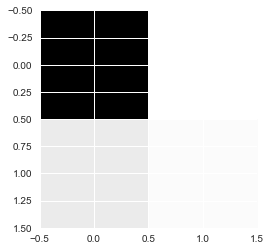

In [23]:
f = plt.figure(figsize=(4,4))
plt.imshow(conf)

Lets take a look at the accuracy per class to get a better idea about how this is performing. To do this, we need to look at the confusion matrix. We will be able to see what classes are getting classified well. 

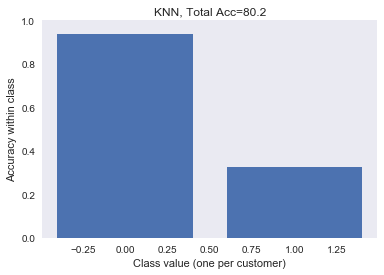

In [24]:
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per customer)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(y,y_hat,title="KNN") # [2] 

Overall, accuracy is good, but not highly accurate. Checking the confusion matrices, our model does not predict default=1 well.

<center> ====Iteration 0 ==== </center>
<center> accuracy 82.1800% </center>
<center> confusion matrix </center>

|Item |	Predicted:0| 	Predicted:1|
| :- | :-:| :-:| 
|Actual: 0| 	21919| 	1445|
|Actual: 1 |	4486 |	2150|


FP or Type I Error: 1445 entries: We predicted yes, but they are actually not

FN or Type II Error: 4486 entries: We predicted no, but they are actually True.

We have 22% as true positive and 78% true negative in our data set. This makes sense since our data showed that the  entries comprised of only about 22% of the dataset 

Our model predicted a high false negative rate (FNR) - the proportion of positive cases that were incorrectly classified as negative of 67.6% (4486 FN out of 6636 actual negatives). This is exactly what we do not want for a financial institution. High FNR means that the Bank/ Credit lender will likely lend money to customers that are most likely to default on their payments. We need to reduce this number but it might mean an increased FP which we have decided is a fair trade. 

<hr/> 

Let's try to get the accuracy up before measuring other performance. One thing that might help is reducing the dimensionality of the dataset like we have done before. However, instead of manually coding the PCA step and then classifying, let's train a PipeLine in sklearn.

A pipeline allows us to cascade operations. The pipeline can be setup to run PCA, then fit the reduced data with a classifier. The beauty of pipelines comes through when performing different cross validations. [2] 

In [25]:
%%time
start = time.time()

from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline

# setup pipeline to take PCA, then fit a KNN classifier. [2] 
knn_clf_pipe = Pipeline(
    [('PCA_Eric',PCA(n_components=28,svd_solver='randomized')), # n_components=29 with 'AGE'
     ('CLF_Eric',KNeighborsClassifier(n_neighbors=9))] # use k = 9 neighbors for higher accuracy
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    knn_clf_pipe.fit(X[train],y[train])
    y_hat[test] = knn_clf_pipe.predict(X[test])

acc = mt.accuracy_score(y, y_hat)
conf = mt.confusion_matrix(y,y_hat) # confusion 
recall = mt.recall_score(y, y_hat)
precision = mt.precision_score(y, y_hat)
f = mt.f1_score(y, y_hat)

print ('KNN, pipeline accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
print(conf )
print("KNN, pipeline recall : {0:.4f}%".format(recall*100))
print("KNN, pipeline Precision: {0:.4f}%".format(precision*100))
print("KNN, pipeline F-measure: {0:.4f}%".format(f*100))

# time
print 'It took', time.time()-start, 'seconds.'   

KNN, pipeline accuracy: 80.1967%
[[21916  1448]
 [ 4493  2143]]
KNN, pipeline recall : 32.2936%
KNN, pipeline Precision: 59.6770%
KNN, pipeline F-measure: 41.9087%
It took 19.2374770641 seconds.
CPU times: user 22.6 s, sys: 492 ms, total: 23.1 s
Wall time: 19.2 s


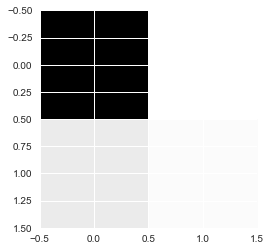

In [26]:
f = plt.figure(figsize=(4,4))
plt.imshow(conf)

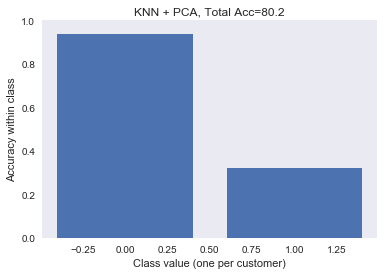

In [27]:
# Lets take a look at the accuracy per class
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per customer)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(y,y_hat,title="KNN + PCA") # [2] 

This is not performing as well as the model without PCA in term of accuracy, although every close. Also, the confusion matrix shows that this model does not prediction default = 1 or default = 0 better than the above non-PCA model did. <br/>

Other metrics are also not as good as the non-PCA model's. For our purpose with this dataset, PCA pipeline will not be chosen for further comparison and analysis. <br/>

<center>====Iteration 0  ==== <br/>
accuracy 80.4933% <br/>
confusion matrix<br/></center>

 
| Item | Predicted:0 | Predicted:1
| :- | :-:| :-:| 
|Actual: 0|21909 |1455
|Actual: 1| 4490 | 2146


<div id='FT1'/> 

### Random Forest - Task 1

For Random Forest Tree, n_estimators, the number of trees in the forest, and max_depth parameter will be optimized during the analysis. We will run n_estimators from 10 to 150, max_depth from 1 to 50. The best values will be chosen for our model in further analysis. 

Other additional parameters are available for further configuration. For our dataset, these will be set as default: 
    - criterion: default as gini 
    - max_features: default to auto for the number of features to consider when looking for the best split. Note that  increasing the max_features increases the number of options to be considered and should therefore improve the performance of the model. However, this also decreases the diversity of the individual trees. In addition, you decrease the speed of algorithm by increasing the max_features. It is important to strike a perfect balance and choose the optimal max_features. The default 'auto' max_features will take care of this task. 
    - class_weight: weights associated with classes, default to None
    - random_state: default to 0 
    - n_jobs = set to use the number of cores in the local machine

<a href="#top">Back to top</a>

In [28]:
# varying n_estimators from 10 to 150 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from ipywidgets import widgets as wd

def lr_explor(estimators_number):
    lr_clf = RandomForestClassifier(max_depth=None, n_estimators=estimators_number, n_jobs=-1)# get object
    
    # iterate through and get predictions for each row in yhat
    for train, test in cv.split(X,y):
        lr_clf.fit(X[train],y[train])
        y_hat[test] = lr_clf.predict(X[test])
    
    # get all the metrics
    acc = mt.accuracy_score(y, y_hat)
    conf = mt.confusion_matrix(y,y_hat) # confusion 
    recall = mt.recall_score(y, y_hat)
    precision = mt.precision_score(y, y_hat)
    f = mt.f1_score(y, y_hat)

    print ('accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
    print(conf )
    print("recall : {0:.4f}%".format(recall*100))
    print("Precision: {0:.4f}%".format(precision*100))
    print("F-measure: {0:.4f}%".format(f*100))

#     accuracies = cross_val_score(lr_clf,X,y=y,cv=cv.split(X,y)) # this also can help with parallelism
#     print(accuracies)   

wd.interact(lr_explor,estimators_number=(10,150,10),__manual=True)



accuracy: 81.3600%
[[21999  1365]
 [ 4227  2409]]
recall : 36.3020%
Precision: 63.8315%
F-measure: 46.2824%


The n-estimator is the number of trees you want to build for computing averages of predictions. The more trees you have, the better the performance of the model but it makes your code slower. One should choose a value as high as their processor can handle to make the predictions stronger and more stable.
For our dataset, as n_estimators increased from 10 - 50, accuracy increased from 80% to a 82%, recall increased from 32% to 37%, precision increased from 61% to 64%, F-measure increased from 43% to 47%

However, there is no significant change with all the metrics as n_estimators increased from 60-150. 
For the purpose of this analysis the n_estimators will be set to 150 for the Random Forest model. 

In [29]:
# interactive tool to vary max_depth from 1 to 50, n_estimators=150. 
def lr_explor(depth_number):
    lr_clf = RandomForestClassifier(max_depth=depth_number, n_estimators=150, n_jobs=-1)# get object
    
    # iterate through and get predictions for each row in yhat
    for train, test in cv.split(X,y):
        lr_clf.fit(X[train],y[train])
        y_hat[test] = lr_clf.predict(X[test])
    
    # get all the metrics
    acc = mt.accuracy_score(y, y_hat)
    conf = mt.confusion_matrix(y,y_hat) # confusion 
    recall = mt.recall_score(y, y_hat)
    precision = mt.precision_score(y, y_hat)
    f = mt.f1_score(y, y_hat)

    print ('accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
    print(conf )
    print("recall : {0:.4f}%".format(recall*100))
    print("Precision: {0:.4f}%".format(precision*100))
    print("F-measure: {0:.4f}%".format(f*100))
    
#     accuracies = cross_val_score(lr_clf,X,y=y,cv=cv.split(X,y)) # this also can help with parallelism
#     print(accuracies)
    
wd.interact(lr_explor,depth_number=(1,50,5),__manual=True)


accuracy: 82.0333%
[[22235  1129]
 [ 4261  2375]]
recall : 35.7896%
Precision: 67.7797%
F-measure: 46.8442%


Increasing the depth from 1 - 11 increased our metrics noticeably with accuracy increase from 77% range to 82%, 
recall increased from 2% to 37%, F-measure increased from 5% to 47%. However, precision decreased from 79% to 68%. 
This is to be expected since generally an increase in max_depth and/or n_estimators increase the accuracy to a point where the computational cost is too great and the accuracy increase becomes non-significant. If we had more time and better computer's configuration, we would continue changing up the parameters until the accuracy increase levels out.

Increasing the max_depth from 11-50 decreased precision noticeably from 68% to 63%, but accuracy, recall, F-measure and did not change significantly. This means further split of 11 may not be a good practice for this model.  

Comparing all the metrics with (max_depth=None, n_estimators=150) and (max_depth = 11, n_estimators=150) combination, 
(max_depth = 11, n_estimators=150) gave an overall better metrics; therefore, for the purpose of this lab, we will use the higher max_depth=11 and n_estimators=150 for further analysis. A higher n_estimators may take too long to generate result and the output may not be significantly different.

In [30]:
%%time

# get a handle to the classifier object, which defines the type
rf_task1 = RandomForestClassifier(max_depth=11, n_estimators=150, n_jobs=-1) 

# iterate through and get predictions for each row in yhat
for train, test in cv.split(X,y):
    rf_task1.fit(X[train],y[train])
    y_hat[test] = rf_task1.predict(X[test])

#evaluation metrics   
acc = mt.accuracy_score(y, y_hat)
conf = mt.confusion_matrix(y,y_hat) # confusion
recall = mt.recall_score(y, y_hat)
precision = mt.precision_score(y, y_hat)
f = mt.f1_score(y, y_hat)

#results in percentage
print ('RF, accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
print(conf)
print("RF, recall : {0:.4f}%".format(recall*100))
print("RF, Precision: {0:.4f}%".format(precision*100))
print("RF, F-measure: {0:.4f}%".format(f*100))


RF, accuracy: 82.0400%
[[22228  1136]
 [ 4252  2384]]
RF, recall : 35.9253%
RF, Precision: 67.7273%
RF, F-measure: 46.9476%
CPU times: user 1min 43s, sys: 994 ms, total: 1min 44s
Wall time: 33.1 s


Reducing the dimensionality of the faces like we have done before by training a PipeLine in sklearn.
A pipeline allows us to cascade operations. The pipeline can be setup to run PCA, then fit the reduced data with a classifier.[2] 

RF, pipeline accuracy: 80.9633%
[[22005  1359]
 [ 4352  2284]]
RF, pipeline recall : 34.4183%
RF, pipeline Precision: 62.6956%
RF, pipeline F-measure: 44.4401%


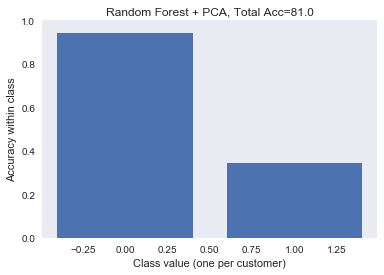

CPU times: user 5min 47s, sys: 3.11 s, total: 5min 50s
Wall time: 1min 40s


In [31]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_clf_pipe = Pipeline(
    [('PCA',PCA(n_components=28, svd_solver='randomized')),
     ('CLF',RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    rf_clf_pipe.fit(X[train],y[train])
    y_hat[test] = rf_clf_pipe.predict(X[test])
    
# total_accuracy = mt.accuracy_score(y, y_hat)
acc = mt.accuracy_score(y, y_hat)
conf = mt.confusion_matrix(y,y_hat) # confusion
recall = mt.recall_score(y, y_hat)
precision = mt.precision_score(y, y_hat)
f = mt.f1_score(y, y_hat)

# print ('Pipeline accuracy', total_accuracy)
print ('RF, pipeline accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
print(conf)
print("RF, pipeline recall : {0:.4f}%".format(recall*100))
print("RF, pipeline Precision: {0:.4f}%".format(precision*100))
print("RF, pipeline F-measure: {0:.4f}%".format(f*100))

# look at the accuracy per class 
plot_class_acc(y,y_hat,title="Random Forest + PCA")

Again, similar to KNN model, this PCA RF model is not performing as well as RF without PCA in terms of accuracy. Also, the confusion matrix shows that this model does not predict default = 1 as well as the above non-PCA model. <br/>

<center>====Iteration 0  ==== <br/>
accuracy 80.4933% <br/>
confusion matrix<br/></center>

 
| Item | Predicted:0 | Predicted:1
| :- | :-:| :-:| 
|Actual: 0|22064|1300
|Actual: 1| 4392 | 2244

Other metrics, especially recall, also are not as good as the non PCA RF model. For our classification purpose with this dataset, PCA pipeline will not be chosen for further comparison and analysis. <br/>

<hr>
Lets get accuracy per class and get access to the different properties of our RF 

RF, Accuracy of the model: 81.9567%
[[22218  1146]
 [ 4267  2369]]
RF, Recall of the model: 35.6992%
RF, Precision of the model: 67.3969%
RF, F-measure of the model: 46.6752%


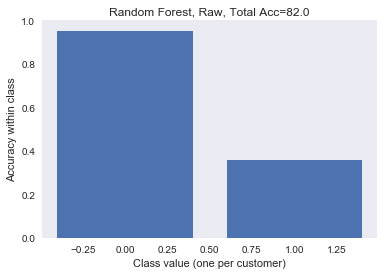

CPU times: user 2min 4s, sys: 1.92 s, total: 2min 6s
Wall time: 50.5 s


In [32]:
%%time
from sklearn.ensemble import RandomForestClassifier

# get a handle to the classifier object, which defines the type
rf_task1 = RandomForestClassifier(max_depth=11, n_estimators=150, n_jobs=-1, oob_score=True) # oob_score: (default=False) whether to use out-of-bag samples to estimate the generalization accuracy.
# # get a handle to the classifier object, which defines the type
# rf_task1 = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1) 

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    rf_task1.fit(X[train],y[train])
    y_hat[test] = rf_task1.predict(X[test])
    
# total_accuracy = mt.accuracy_score(y, y_hat)
# print ('Accuracy', total_accuracy)

# get the metrics   
acc = mt.accuracy_score(y, y_hat)
conf = mt.confusion_matrix(y,y_hat) # confusion matrix 
recall = mt.recall_score(y, y_hat)
precision = mt.precision_score(y, y_hat)
f = mt.f1_score(y, y_hat)

# Since the return values have 6 sig figures, we format the end results in percentage to have 4 decimal pts. 
print("RF, Accuracy of the model: {0:.4f}%".format(acc*100)) 
print conf
print("RF, Recall of the model: {0:.4f}%".format(recall*100))
print("RF, Precision of the model: {0:.4f}%".format(precision*100))
print("RF, F-measure of the model: {0:.4f}%".format(f*100))

# add metrics to metric lists 
accuracy_task1.append(['RF',acc])
conf_task1.append(['RF',conf])
recall_task1.append(['RF',recall])
precision_task1.append(['RF',precision])
fmeasure_task1.append(['RF',f])
# print accuracy_task1 
# print conf_task1 
# print precision_task1 
# print recall_task1
# print fmeasure_task1 

# look at the accuracy per class 
plot_class_acc(y,y_hat,title="Random Forest, Raw")

In [33]:
# now lets get access to the different properties of our RF
print (rf_task1)
# plt.barh(range(len(rf_task1.feature_importances_)), rf_task1.feature_importances_)
# plt.show()
print ('Generalization score estimate from training data', rf_task1.oob_score_) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
('Generalization score estimate from training data', 0.81948816710492201)


Out-of-bag (oob) error estimator is an internal unbiased estimate of the test set error. It is built in to the Random Forest algorithm so there is no need for cross-validation or for a separate test set to get an unbiased estimate of the test set error.
With an estimate score of 82.0%, we can confidently say that our model is performing just as well as the KNN model. The accuracies of the two models are comparable.

#### Tree Ensemble Comparisons

In [34]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score

num_estimators = 150
# lets train some trees
clf_array = [
    ('Stump',              DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)),
    ('Tree',               DecisionTreeClassifier()),
    ('Random Trees',       RandomForestClassifier(max_depth=11, n_estimators=num_estimators)),
    ('Extra Random Trees', ExtraTreesClassifier(n_estimators=num_estimators,min_samples_split=2)),
    ('Boosted Tree',       GradientBoostingClassifier(n_estimators=num_estimators)), #takes a long time
    ]

for clf in clf_array:
    acc = cross_val_score(clf[1],X,y)
    print (clf[0], acc.mean())

('Stump', 0.8196)
('Tree', 0.72656666666666669)
('Random Trees', 0.81936666666666669)
('Extra Random Trees', 0.80483333333333329)
('Boosted Tree', 0.81999999999999995)
CPU times: user 57.2 s, sys: 1.82 s, total: 59 s
Wall time: 1min 6s


'Stump', 'Random Trees' (RF), 'Boosted Tree' are the winners here. The difference between these 3 are not significant. 'Stump' is the fastest to run, 'Boosted Tree' takes the longest to run.
Taking the advantage of time efficiency, RF is a sufficient model for our analysis. 

<div id='LR1' /> 

### Logistic Regression - Task 1

For logistic regression, the following parameters will be optimized during the analysis:
    - Penalty {l1, l2} 
    - Cost {0.001:100}: cost was toggled using a widget, as small cost implies stronger regulation

Others additional parameters are available for further configuration. For our dataset, these will be set as default: 

    - class_weight : was toggled between balanced and None 
    - n_jobs: set to default 

For the Logistic Regression model, C, cost input parameter, can be manipulated using an interactive slider tool.

<a href='#top'> Back to top </a>

In [35]:
%%time
# Let's start with a simple classifier and ten fold cross validation, calculating accuracy to start.
start = time.time()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
# here we can setup the object with different learning parameters and constants
lr_task1 = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# iterate through and get predictions for each row in yhat
for train, test in cv.split(X,y):
    lr_task1.fit(X[train],y[train])
    y_hat[test] = lr_task1.predict(X[test])

#evaluation metrics   
acc = mt.accuracy_score(y, y_hat)
conf = mt.confusion_matrix(y,y_hat) # confusion 
recall = mt.recall_score(y, y_hat)
precision = mt.precision_score(y, y_hat)
f = mt.f1_score(y, y_hat)
 
#results in percentage
print ('LR, accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
print(conf )
print("LR, recall : {0:.4f}%".format(recall*100))
print("LR, Precision: {0:.4f}%".format(precision*100))
print("LR, F-measure: {0:.4f}%".format(f*100))


LR, accuracy: 80.9900%
[[22706   658]
 [ 5045  1591]]
LR, recall : 23.9753%
LR, Precision: 70.7426%
LR, F-measure: 35.8132%
CPU times: user 5.21 s, sys: 189 ms, total: 5.4 s
Wall time: 4.69 s


Change class_weight to "balanced"

In [36]:
%%time
# Let's start with a simple classifier and ten fold cross validation, calculating accuracy to start.
start = time.time()

# first we create a reusable logisitic regression object
# here we can setup the object with different learning parameters and constants
lr_task1 = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced') # get object

# iterate through and get predictions for each row in yhat
for train, test in cv.split(X,y):
    lr_task1.fit(X[train],y[train])
    y_hat[test] = lr_task1.predict(X[test])

#evaluation metrics   
acc = mt.accuracy_score(y, y_hat)
conf = mt.confusion_matrix(y,y_hat) # confusion 
recall = mt.recall_score(y, y_hat)
precision = mt.precision_score(y, y_hat)
f = mt.f1_score(y, y_hat)
 
#results in percentage
print ('LR, accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
print(conf )
print("LR, recall : {0:.4f}%".format(recall*100))
print("LR, Precision: {0:.4f}%".format(precision*100))
print("LR, F-measure: {0:.4f}%".format(f*100))

LR, accuracy: 69.0533%
[[16490  6874]
 [ 2410  4226]]
LR, recall : 63.6829%
LR, Precision: 38.0721%
LR, F-measure: 47.6545%
CPU times: user 4.14 s, sys: 139 ms, total: 4.28 s
Wall time: 2.82 s


Change class_weight to "balanced" worsen the accuracy significantly. We will keep class_weight as None for further analysis. 


In [37]:
%%time
# change penalty to'l1'
# Let's start with a simple classifier and ten fold cross validation, calculating accuracy to start.
start = time.time()

# first we create a reusable logisitic regression object
# here we can setup the object with different learning parameters and constants
lr_task1 = LogisticRegression(penalty='l1', C=1.0, class_weight=None) # get object

# iterate through and get predictions for each row in yhat
for train, test in cv.split(X,y):
    lr_task1.fit(X[train],y[train])
    y_hat[test] = lr_task1.predict(X[test])

#evaluation metrics   
acc = mt.accuracy_score(y, y_hat)
conf = mt.confusion_matrix(y,y_hat) # confusion 
recall = mt.recall_score(y, y_hat)
precision = mt.precision_score(y, y_hat)
f = mt.f1_score(y, y_hat)
 
#results in percentage
print ('LR, accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
print(conf )
print("LR, recall : {0:.4f}%".format(recall*100))
print("LR, Precision: {0:.4f}%".format(precision*100))
print("LR, F-measure: {0:.4f}%".format(f*100))

LR, accuracy: 80.9967%
[[22708   656]
 [ 5045  1591]]
LR, recall : 23.9753%
LR, Precision: 70.8055%
LR, F-measure: 35.8212%
CPU times: user 15.2 s, sys: 412 ms, total: 15.6 s
Wall time: 14.9 s


Here we observed that changing penalty from l2 to l1 did not change the accuracy. However, in Minilab1, using more intensive tests and comparisons, we found that with our imbalanced and sparse dataset, l1 was a better parameter. 
Therefore, we will use l1 for our model for further analysis. 

<hr/> 
Below is the interactive tool for adjusting cost C from (0.001,100,0.05)


In [38]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from ipywidgets import widgets as wd

# get a handle to the classifier object, which defines the type
#penalty is set to default, which is 12.
def lr_explor(cost):
    lr_task1 = LogisticRegression(penalty='l1', C=cost, class_weight=None, n_jobs=-1) # class_weight='balanced'

    # iterate through and get predictions for each row in yhat
    for train, test in cv.split(X,y):
        lr_task1.fit(X[train],y[train])
        y_hat[test] = lr_task1.predict(X[test])
    
    #evaluation metrics   
    acc = mt.accuracy_score(y, y_hat)
    conf = mt.confusion_matrix(y,y_hat) # confusion 
    recall = mt.recall_score(y, y_hat)
    precision = mt.precision_score(y, y_hat)
    f = mt.f1_score(y, y_hat)

    #results in percentage
    print ('LR, accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
    print(conf )
    print("LR, recall : {0:.4f}%".format(recall*100))
    print("LR, Precision: {0:.4f}%".format(precision*100))
    print("LR, F-measure: {0:.4f}%".format(f*100))

wd.interact(lr_explor,cost=(0.001,100.00,0.05),__manual=True)


LR, accuracy: 80.9500%
[[22726   638]
 [ 5077  1559]]
LR, recall : 23.4931%
LR, Precision: 70.9604%
LR, F-measure: 35.2994%


Increasing C from 0.001 to 0.05 changed the metrics noticeably, accuracy increased from 78% to 81%, recall increased from 5% to 23%, F-measure increased from 9% to 35%. However, precision decreased slightly from 72% to 71%. 

Increasing C from 0.05 to 100 did not noticeably change the metrics. This is expected because the dataset is normalized.
Since the above result with C = 1.0 gave a slightly better result than C = .05, we will use C = 1.0 in our model.

LR, pipeline accuracy: 80.9867%
[[22707   657]
 [ 5047  1589]]
LR, pipeline recall : 23.9451%
LR, pipeline Precision: 70.7480%
LR, pipeline F-measure: 35.7802%


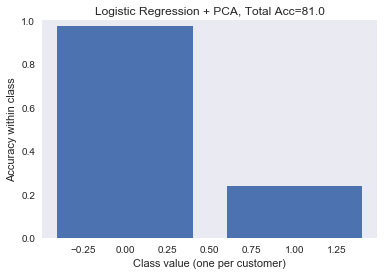

In [39]:
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)

from sklearn.pipeline import Pipeline
# you can apply the StandardScaler function inside of the cross-validation loop 
#  but this requires the use of PipeLines in scikit. 
#  A pipeline can apply feature pre-processing and data fitting in one compact notation

lr_clf_pipe = Pipeline(
    [('PCA',PCA(n_components=28, svd_solver='randomized')),
     ('CLF', LogisticRegression(penalty='l1', C=1.0, class_weight=None))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    lr_clf_pipe.fit(X[train],y[train])
    y_hat[test] = lr_clf_pipe.predict(X[test])
    
# total_accuracy = mt.accuracy_score(y, y_hat)
acc = mt.accuracy_score(y, y_hat)
conf = mt.confusion_matrix(y,y_hat) # confusion
recall = mt.recall_score(y, y_hat)
precision = mt.precision_score(y, y_hat)
f = mt.f1_score(y, y_hat)

# print ('Pipeline accuracy', total_accuracy)
print ('LR, pipeline accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
print(conf)
print("LR, pipeline recall : {0:.4f}%".format(recall*100))
print("LR, pipeline Precision: {0:.4f}%".format(precision*100))
print("LR, pipeline F-measure: {0:.4f}%".format(f*100))

# look at the accuracy per class 
plot_class_acc(y,y_hat,title="Logistic Regression + PCA")

LR, Accuracy of the model: 80.9967%
[[22708   656]
 [ 5045  1591]]
LR, Recall of the model: 23.9753%
LR, Precision of the model: 70.8055%
LR, F-measure of the model: 35.8212%


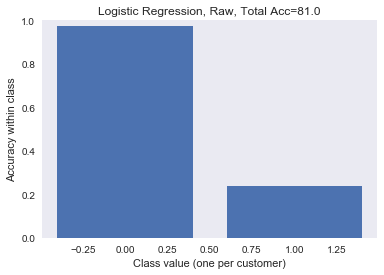

CPU times: user 13.7 s, sys: 375 ms, total: 14 s
Wall time: 13.3 s


In [40]:
%%time
# Let's start with a simple classifier and ten fold cross validation, calculating accuracy to start.
start = time.time()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
# here we can setup the object with different learning parameters and constants
lr_task1 = LogisticRegression(penalty='l1', C=1.0, class_weight=None) # get object

# iterate through and get predictions for each row in yhat
for train, test in cv.split(X,y):
    lr_task1.fit(X[train],y[train])
    y_hat[test] = lr_task1.predict(X[test])

# get the metrics   
acc = mt.accuracy_score(y, y_hat)
conf = mt.confusion_matrix(y,y_hat) # confusion matrix 
recall = mt.recall_score(y, y_hat)
precision = mt.precision_score(y, y_hat)
f = mt.f1_score(y, y_hat)

# Since the return values have 6 sig figures, we format the end results in percentage to have 4 decimal pts. 
print("LR, Accuracy of the model: {0:.4f}%".format(acc*100)) 
print conf
print("LR, Recall of the model: {0:.4f}%".format(recall*100))
print("LR, Precision of the model: {0:.4f}%".format(precision*100))
print("LR, F-measure of the model: {0:.4f}%".format(f*100))

# add metrics to metric lists 
accuracy_task1.append(['LR',acc])
conf_task1.append(['LR',conf])
recall_task1.append(['LR',recall])
precision_task1.append(['LR',precision])
fmeasure_task1.append(['LR',f])
# print accuracy_task1 
# print conf_task1 
# print precision_task1 
# print recall_task1
# print fmeasure_task1 

# look at the accuracy per class 
plot_class_acc(y,y_hat,title="Logistic Regression, Raw")

The result metrics were about the same for LR with and without PCA. We will use the metrics of the without PCA for further analysis. 

<hr/>

<div id='Task2'/>

## TASK 2: 'LIMIT_BAL_250k' classification 

This is looking for a second prediction:
- We will predict users with a high balance limit. Set up originally in the data munging section at the top as LIMIT_BAL above 250K. The reason we chose 250k NT is because the 75% quantile is 240k NT, which means that cutting the LIMIT_BAL at 250k NT, we will create a binary attribute that has the ratio of 0 to 1 of 22%, which is similar to the default attribute in Task 1. This is reasonable since we are trying to measure the performance of our predictive models. 
- The business justification is that the CC company can uses these predictions to understand the pool of customers that have high balance limits (true positives) and those that "should have" a high balance limit (false positives).
- In other words, even if the high balance prediction does not match actual high balance limit, it is still an indicator that the data supports a high balance limit. 
- Special offerings or ads can be designed to target high balance limit customers.

 <a href="#top">Back to top</a>

In [41]:
# make a copy of the data frame for training for Task 2
df_copy2 = df_copy.copy()

<div id='TT2'/>
### Training and Testing Split - Task 2: 

A different 10 fold stratified cross validation object is created for Task 2.

In [42]:
%%time
# Let's start with a simple classifier and ten fold cross validation, calculating accuracy to start.
start = time.time()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

# create variables we are more familiar with
y2 = df_copy2['LIMIT_BAL_250k'].values # get the predictor values
del df_copy2['LIMIT_BAL_250k'] # get rid of the class label
X2 = df_copy2.values # use everything else to predict!

y2_hat = np.zeros(y2.shape) # we will fill this with predictions

scl = StandardScaler()
X2 = scl.fit_transform(X2)

# create cross validation iterator by by performing 10 fold cross validation
cv = StratifiedKFold(n_splits=10, random_state=None) # starting out with random_state=42 so that we will always get the same output the first time we make the split. We want reproducible results.
                     
print(cv)
cv.get_n_splits(X2,y2)

print 'It took', time.time()-start, 'seconds.'   

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
It took 0.0270829200745 seconds.
CPU times: user 17.1 ms, sys: 11.2 ms, total: 28.3 ms
Wall time: 27.5 ms


<div id='KNN2' /> 
<div id='KNN1'/>

### KNN Classifier - Task 2

Similar to Task 1, for K Nearest Neighbors, n_neighbors parameter will be optimized during the analysis. We will run n_neighbors from 1 to 10 and identify the best kvalue and this value is passed to n_neighbors for further analysis. 

Other additional parameters are available for further configuration. For our dataset, these will be set as default: 
    - weights: function used in prediction, uniform is the default. For our dataset, we wanted all points in each neighborhood are weighted equally
    - algorithm: default as auto, the system was assigned to decide the most appropriate algorithm based on the values passed to fit method.
    - n_jobs = set to use the number of cores in the local machine
<hr> 
** First, we set up KNN Classifier iterator to determine the accurate number of nearest neighbors running from 1 to 10.**

<a href="#top"> Back to Top </a> 


In [43]:
%%time
start = time.time()

# Let's start with a simple classifier and ten fold cross validation, calculating best accuracy and its k value: 
for k in range(1,11): 
    # get a handle to the classifier object, which defines the type
    clf = KNeighborsClassifier(n_neighbors=k)
    for train, test in cv.split(X2,y2):
        clf.fit(X2[train],y2[train])
        y2_hat[test] = clf.predict(X2[test])
    # now iterate through and get predictcross_val_predictions, saved to the correct row in yhat
    # NOTE: you can parallelize this using the cross_val_predict method
    #evaluation metrics  
    total_accuracy = mt.accuracy_score(y2, y2_hat)
    conf = mt.confusion_matrix(y2,y2_hat) # confusion 
    # print out the total accuracy and k value 
    print ('KNN accuracy with %d neighbors is: %f' %(k,total_accuracy) )# ('Accuracy of classifier with %d neighbors is: %.2f'%(k,acc)) 
    print(conf )

print 'It took', time.time()-start, 'seconds.'   


KNN accuracy with 1 neighbors is: 0.754800
[[19844  3439]
 [ 3917  2800]]
KNN accuracy with 2 neighbors is: 0.793800
[[22246  1037]
 [ 5149  1568]]
KNN accuracy with 3 neighbors is: 0.786967
[[21021  2262]
 [ 4129  2588]]
KNN accuracy with 4 neighbors is: 0.798100
[[22202  1081]
 [ 4976  1741]]
KNN accuracy with 5 neighbors is: 0.795400
[[21467  1816]
 [ 4322  2395]]
KNN accuracy with 6 neighbors is: 0.801933
[[22251  1032]
 [ 4910  1807]]
KNN accuracy with 7 neighbors is: 0.801333
[[21739  1544]
 [ 4416  2301]]
KNN accuracy with 8 neighbors is: 0.803667
[[22299   984]
 [ 4906  1811]]
KNN accuracy with 9 neighbors is: 0.803533
[[21911  1372]
 [ 4522  2195]]
KNN accuracy with 10 neighbors is: 0.804800
[[22343   940]
 [ 4916  1801]]
It took 652.714476109 seconds.
CPU times: user 10min 26s, sys: 7 s, total: 10min 33s
Wall time: 10min 52s


Similar to what we observed in Task 1 KNN, best accuracy returned by the KNN Classifier iterator is: 80.6% with k value of: 10.

For our dataset, the accuracy increased significantly when k increased from 1 - 6. However, the accuracy did not show significant increase for k higher than 6, but rather hovered around high 79% to 80%. Looking at the positive trend between k and accuracy, we suspect that higher k may produce a better accuracy. 

Looking at the confusion matrices, k = 1 has the lowest false negative (FN), while k = 10 has the lowest false positive (FP). This makes sense that using k=1 will always give 0 classification error in the training set, because we use the single observation to classify itself. A more reliable way to make a sense of the performance of an algorithm is to make it give a prediction for a sample it has never seen. 

In task 2, depending on the objective of the business, we can choose to minimize FN or FP. 
For example, If the purpose is to identify customers with greater than 250k NT and send them ads or promotions for products/services, then we want to minimize FN. It's more costly to miss out on customers with credit limit greater than 250k NT than to wrongly classify them as if they had greater than 250k NT credit limit. 
So for this purpose, it makes more sense to ensure that the model is able to predict positive (1, yes for those with greater than 250k NT credit limit) correctly. On the other hand, we want to look at the FN and ensure our model has the least false negative (FN) possible. Also, our data set is biased with 78% positive, so it makes more sense to ensure that the model is able to predict negative. 


Also, an odd number of k has a better true negative/False negative (TN/FN) ratio than with an even number of k. 
The 'k' in knn is for how many close observations to use in classifying a new sample, using a larger k will help mitigate the amount of biases towards overestimating the true expected error because training folds will be more closely related to the total dataset [27].Combined with the accuracy, it's safe for us to use k = 9 neighbors for maximum accuracy and (TN/FN) ratio.
<hr/>

Next, we will get all other evaluation metrics with KNN. 

In [45]:
%%time
start = time.time()

# getting all the metrics

# Trainning and testing of the model - task 2, with k = 9: 
knn_task2 = KNeighborsClassifier(n_neighbors=9) #weights='uniform', algorithm='auto', n_jobs=-1

# iterate through and get predictions for each row in yhat
for train, test in cv.split(X2,y2):
    knn_task2.fit(X2[train],y2[train])
    y2_hat[test] = knn_task2.predict(X2[test])

#evaluation metrics   
acc = mt.accuracy_score(y2, y2_hat)
conf = mt.confusion_matrix(y2,y2_hat) # confusion matrix 
recall = mt.recall_score(y2, y2_hat)
precision = mt.precision_score(y2, y2_hat)
f = mt.f1_score(y2, y2_hat)

#results in percentage
# Since the return values have 6 sig figures, we format the end results in percentage to have 4 decimal pts. 
print("KNN, Accuracy of the model: {0:.4f}%".format(acc*100)) 
print conf
print("KNN, Recall of the model: {0:.4f}%".format(recall*100))
print("KNN, Precision of the model: {0:.4f}%".format(precision*100))
print("KNN, F-measure of the model: {0:.4f}%".format(f*100))

# add metrics to metric lists 
accuracy_task2.append(['KNN',acc])
conf_task2.append(['KNN',conf])
recall_task2.append(['KNN',recall])
precision_task2.append(['KNN',precision])
fmeasure_task2.append(['KNN',f])

print 'It took', time.time()-start, 'seconds.' 

KNN, Accuracy of the model: 80.3533%
[[21911  1372]
 [ 4522  2195]]
KNN, Recall of the model: 32.6783%
KNN, Precision of the model: 61.5363%
KNN, F-measure of the model: 42.6877%
It took 74.5699210167 seconds.
CPU times: user 1min 11s, sys: 866 ms, total: 1min 12s
Wall time: 1min 14s


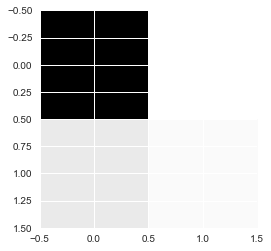

In [46]:
f = plt.figure(figsize=(4,4))
plt.imshow(conf)

Let’s take a look at the accuracy per class to get a better idea about how this is performing. To do this, we need to look at the confusion matrix. We will be able to see what classes are well classified. 


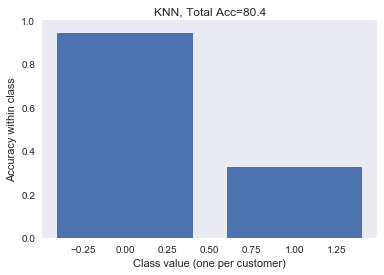

CPU times: user 209 ms, sys: 6.05 ms, total: 215 ms
Wall time: 218 ms


In [47]:
%%time
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per customer)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(y2,y2_hat,title="KNN") # [2] 

Overall, accuracy is good, but not highly accurate. Checking the confusion matrices, our model does not predict default=1 well.

<center> ====Iteration 0 ==== </center>
<center> accuracy 82.1800% </center>
<center> confusion matrix </center>

|Item |	Predicted:0| 	Predicted:1|
| :- | :-:| :-:| 
|Actual: 0| 	21911| 	1372|
|Actual: 1 |	4522 |	2195|

FP or Type I Error: 1372 entries: We predicted yes, but they were actually not

FN or Type II Error: 4522 entries: We predicted no, but they were actually True.

We have 22% as true positive and 78% true negative in our dataset. This makes sense because our data showed that the  entries comprised of roughly 22% of the dataset 

Our model predicted a high false negative rate (FN) - the proportion of positive cases that were incorrectly classified as negative of 67.3% (4522 FN out of 6716 actual negatives). This is not exactly what we want for a financial institution. High FNR means that the Bank/ Credit business will likely miss those FN of higher than 250k NT credit limit to target for ads or special offerings. We need to reduce this number to a minimum. 

<hr/> 
Let's try to get the accuracy up before measuring other performances. One thing that might help is reducing the dimensionality of the dataset like we have done before. However, instead of manually coding the PCA step and then classifying, let's train a PipeLine in sklearn.

A pipeline allows us to cascade operations. The pipeline can be setup to run PCA, then fit the reduced data with a classifier. The beauty of pipelines comes through when performing different cross validations. [2] 

In [48]:
%%time
start = time.time()

from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline

# setup pipeline to take PCA, then fit a KNN classifier. [2] 
knn_clf_pipe = Pipeline(
    [('PCA_Eric',PCA(n_components=28,svd_solver='randomized')),
     ('CLF_Eric',KNeighborsClassifier(n_neighbors=9))] # use k = 9 neighbors for higher accuracy
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X2,y2):
    knn_clf_pipe.fit(X2[train],y2[train])
    y2_hat[test] = knn_clf_pipe.predict(X2[test])

acc = mt.accuracy_score(y2, y2_hat)
conf = mt.confusion_matrix(y2,y2_hat) # confusion 
recall = mt.recall_score(y2, y2_hat)
precision = mt.precision_score(y2, y2_hat)
f = mt.f1_score(y2, y2_hat)

print ('KNN, pipeline accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
print(conf )
print("KNN, pipeline recall : {0:.4f}%".format(recall*100))
print("KNN, pipeline Precision: {0:.4f}%".format(precision*100))
print("KNN, pipeline F-measure: {0:.4f}%".format(f*100))

# time
print 'It took', time.time()-start, 'seconds.'   

KNN, pipeline accuracy: 80.3600%
[[21908  1375]
 [ 4517  2200]]
KNN, pipeline recall : 32.7527%
KNN, pipeline Precision: 61.5385%
KNN, pipeline F-measure: 42.7517%
It took 25.3370909691 seconds.
CPU times: user 27.5 s, sys: 816 ms, total: 28.3 s
Wall time: 25.3 s


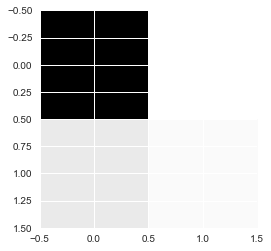

In [49]:
f = plt.figure(figsize=(4,4))
plt.imshow(conf)

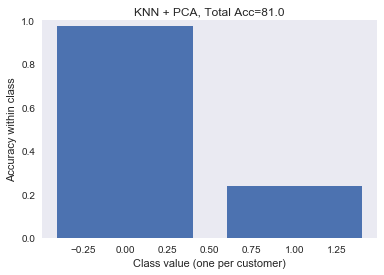

In [50]:
# Lets take a look at the accuracy per class
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per customer)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(y,y_hat,title="KNN + PCA") # [2] 

This is not performing as well as non-PCA in terms of accuracy. Also, the confusion matrix shows that this model does not prediction default = 1 as well as the non-PCA model. <br/>

<center>====Iteration 0  ==== <br/>
accuracy 80.4933% <br/>
confusion matrix<br/></center>

 
| Item | Predicted:0 | Predicted:1
| :- | :-:| :-:| 
|Actual: 0|22348|1016
|Actual: 1| 4836 | 1800


Other metrics also are not as good as the non-PCA model. For our purpose with this dataset, PCA pipeline will not be chosen for further comparison and analysis. <br/>


<div id='FT2' />

### Random Forest Tree - Task 2

For Random Forest Tree, n_estimators, the number of trees in the forest, and max_depth parameter will be optimized during the analysis. We will run n_estimators from 10 to 150, max_depth from 1 to 50. The best values will be chosen for our model in further analysis. 

Other additional parameters are available for further configuration. For our dataset, these will be set as default: 
    - criterion: default as gini 
    - max_features: default to auto for the number of features to consider when looking for the best split. Note that  increasing the max_features increases the number of options to be considered and should therefore improve the performance of the model. However, this also decreases the diversity of the individual trees. In addition, you decrease the speed of algorithm by increasing the max_features. It is important to strike a perfect balance and choose the optimal max_features. The default 'auto' max_features will take care of this task. 
    - class_weight: weights associated with classes, default to None
    - random_state: default to 0 
    - n_jobs = set to use the number of cores in the local machine
    

<a href="#top"> Back to Top </a>

In [51]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from ipywidgets import widgets as wd

def lr_explor(estimators_number):
    lr_clf = RandomForestClassifier(max_depth=None, n_estimators=estimators_number, n_jobs=-1)# get object
    
    # iterate through and get predictions for each row in yhat
    for train, test in cv.split(X2,y2):
        lr_clf.fit(X2[train],y2[train])
        y2_hat[test] = lr_clf.predict(X2[test])
    
    # get all the metrics
    acc = mt.accuracy_score(y2, y2_hat)
    conf = mt.confusion_matrix(y2,y2_hat) # confusion 
    recall = mt.recall_score(y2, y2_hat)
    precision = mt.precision_score(y2, y2_hat)
    f = mt.f1_score(y2, y2_hat)

    print ('accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
    print(conf )
    print("recall : {0:.4f}%".format(recall*100))
    print("Precision: {0:.4f}%".format(precision*100))
    print("F-measure: {0:.4f}%".format(f*100))

#     accuracies = cross_val_score(lr_clf,X2,y=y2,cv=cv.split(X2,y2)) # this also can help with parallelism
#     print(accuracies)   

wd.interact(lr_explor,estimators_number=(10,150,10),__manual=True)


accuracy: 81.2333%
[[22057  1226]
 [ 4404  2313]]
recall : 34.4350%
Precision: 65.3574%
F-measure: 45.1053%


As n_estimators increased from 10 - 50, accuracy increased from 80% to 82%, recall increased from 32% to 37%, F-measure increased from 43% to 47%, precision increased from 62% to 66%. 

However, there was no significant change with all the metrics as n_estimators increased from 60 to 150, to maximize recall, the n_estimators will be set to 150 for our Random Forest model.


In [52]:
# interactive tool to vary max_depth from 1 to 50, n_estimators=150. 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from ipywidgets import widgets as wd

def lr_explor(depth_number):
    lr_clf = RandomForestClassifier(max_depth=depth_number, n_estimators=150, n_jobs=-1)# get object
    
    # iterate through and get predictions for each row in yhat
    for train, test in cv.split(X2,y2):
        lr_clf.fit(X2[train],y2[train])
        y2_hat[test] = lr_clf.predict(X2[test])
    
    # get all the metrics
    acc = mt.accuracy_score(y2, y2_hat)
    conf = mt.confusion_matrix(y2,y2_hat) # confusion 
    recall = mt.recall_score(y2, y2_hat)
    precision = mt.precision_score(y2, y2_hat)
    f = mt.f1_score(y2, y2_hat)

    print ('accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
    print(conf )
    print("recall : {0:.4f}%".format(recall*100))
    print("Precision: {0:.4f}%".format(precision*100))
    print("F-measure: {0:.4f}%".format(f*100))
#     accuracies = cross_val_score(lr_clf,X2,y=y2,cv=cv.split(X2,y2)) # this also can help with parallelism
#     print(accuracies)
    
wd.interact(lr_explor,depth_number=(1,50,5),__manual=True)


accuracy: 81.8500%
[[22187  1096]
 [ 4349  2368]]
recall : 35.2538%
Precision: 68.3603%
F-measure: 46.5180%


Increasing the depth from 1 - 11 increased our metrics noticeably with accuracy increase from 77% range to 82%, 
recall increased from 10% to 33%, F-measure increased from 19% to 45%. However, precision decreased from 92% to 71%. 
Again, this is to be expected since generally an increase in max_depth and/or n_estimators increases the accuracy to a point where the computational cost is too great and the accuracy increase becomes non-significant. If we had more time and better computer's configuration, we would continue changing up the parameters until the accuracy increase leveled out.

Increasing max_depth from 11-50 continued to noticeably decrease precision from 71% to 67%, but accuracy, recall, F-measure and did not change significantly. This means further split of 11 may not be a good practice for this model.  


Comparing all the metrics with (max_depth=None, n_estimators=150) and (max_depth = 11, n_estimators=150) combination, 
(max_depth = 11, n_estimators=150) gave slightly better metrics, especially recall; therefore, for the purpose of this lab, we will use the higher max_depth=11 and n_estimators=150 for further analysis. A higher n_estimators may take too long to generate result and the output may not be significantly different.


RF, accuracy: 81.8900%
[[22603   680]
 [ 4753  1964]]
RF, recall : 29.2392%
RF, Precision: 74.2814%
RF, F-measure: 41.9613%


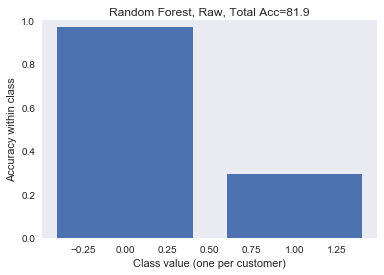

CPU times: user 1min 57s, sys: 1.97 s, total: 1min 59s
Wall time: 41.8 s


In [54]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from ipywidgets import widgets as wd

# get a handle to the classifier object, which defines the type
rf_task2 = RandomForestClassifier(max_depth=11, n_estimators=150, n_jobs=-1) 

# iterate through and get predictions for each row in yhat
for train, test in cv.split(X2,y2):
    rf_task2.fit(X2[train],y2[train])
    y2_hat[test] = rf_task2.predict(X2[test])

#evaluation metrics   
acc = mt.accuracy_score(y2, y2_hat)
conf = mt.confusion_matrix(y2,y2_hat) # confusion
recall = mt.recall_score(y2, y2_hat)
precision = mt.precision_score(y2, y2_hat)
f = mt.f1_score(y2, y2_hat)

#results in percentage
print ('RF, accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
print(conf)
print("RF, recall : {0:.4f}%".format(recall*100))
print("RF, Precision: {0:.4f}%".format(precision*100))
print("RF, F-measure: {0:.4f}%".format(f*100))

# plot the accuracy of each class: 
plot_class_acc(y2,y2_hat,title="Random Forest, Raw")

Reducing the dimensionality of the dataset like we have done before by training a PipeLine in sklearn.
A pipeline allows us to cascade operations. The pipeline can be setup to run PCA, then fit the reduced data with a classifier. [2]

RF, pipeline accuracy: 81.6300%
[[22566   717]
 [ 4794  1923]]
RF, pipeline recall : 28.6289%
RF, pipeline Precision: 72.8409%
RF, pipeline F-measure: 41.1029%


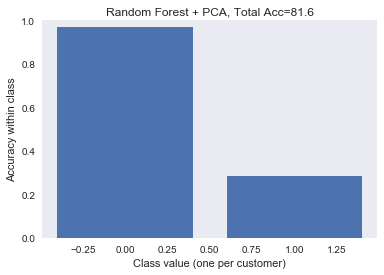

CPU times: user 4min 15s, sys: 3.39 s, total: 4min 18s
Wall time: 1min 23s


In [55]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_clf_pipe = Pipeline(
    [('PCA',PCA(n_components=28, svd_solver='randomized')),
     ('CLF',RandomForestClassifier(max_depth=11, n_estimators=150, n_jobs=-1))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X2,y2):
    rf_clf_pipe.fit(X2[train],y2[train])
    y2_hat[test] = rf_clf_pipe.predict(X2[test])

    # total_accuracy = mt.accuracy_score(y, y_hat)
acc = mt.accuracy_score(y2, y2_hat)
conf = mt.confusion_matrix(y2,y2_hat) # confusion
recall = mt.recall_score(y2, y2_hat)
precision = mt.precision_score(y2, y2_hat)
f = mt.f1_score(y2, y2_hat)

# print ('Pipeline accuracy', total_accuracy)
print ('RF, pipeline accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
print(conf)
print("RF, pipeline recall : {0:.4f}%".format(recall*100))
print("RF, pipeline Precision: {0:.4f}%".format(precision*100))
print("RF, pipeline F-measure: {0:.4f}%".format(f*100))

# total_accuracy = mt.accuracy_score(y2, y2_hat)
# print ('Pipeline accuracy', total_accuracy)
plot_class_acc(y2,y2_hat,title="Random Forest + PCA")

Again, similar to KNN model, this PCA RF model is not performing as well as RF without PCA in term of accuracy. Also, Again, similar to KNN model, this PCA RF model is not performing as well as RF without PCA in terms of accuracy. Also, the confusion matrix shows that this model does not predict default = 1 as well as the non-PCA model. <br/>

<center>====Iteration 0  ==== <br/>
accuracy 80.4933% <br/>
confusion matrix<br/></center>

 
| Item | Predicted:0 | Predicted:1
| :- | :-:| :-:| 
|Actual: 0|22064|1300
|Actual: 1| 4392 | 2244

Other metrics, especially recall, also are not as good as the non-PCA RF model. For our purpose with this dataset, PCA pipeline will not be chosen for further comparison and analysis. <br/> 

<hr>
Lets get accuracy per class and get access to the different properties of our Raw (without PCA) RF 

RF, Accuracy of the model: 81.8800%
[[22597   686]
 [ 4750  1967]]
RF, Recall of the model: 29.2839%
RF, Precision of the model: 74.1425%
RF, F-measure of the model: 41.9851%


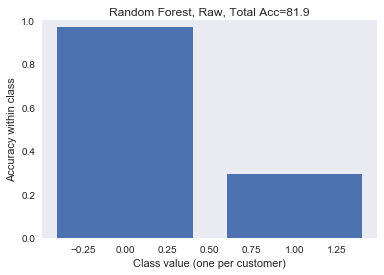

CPU times: user 2min 1s, sys: 2.13 s, total: 2min 4s
Wall time: 48 s


In [56]:
%%time
from sklearn.ensemble import RandomForestClassifier

# get a handle to the classifier object, which defines the type
rf_task2 = RandomForestClassifier(max_depth=11, n_estimators=150, n_jobs=-1, oob_score=True) # oob_score: (default=False) whether to use out-of-bag samples to estimate the generalization accuracy.
# # get a handle to the classifier object, which defines the type
# rf_task1 = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1) 

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X2,y2):
    rf_task2.fit(X2[train],y2[train])
    y2_hat[test] = rf_task2.predict(X2[test])
    
# total_accuracy = mt.accuracy_score(y, y_hat)
# print ('Accuracy', total_accuracy)

# get the metrics   
acc = mt.accuracy_score(y2, y2_hat)
conf = mt.confusion_matrix(y2,y2_hat) # confusion matrix 
recall = mt.recall_score(y2, y2_hat)
precision = mt.precision_score(y2, y2_hat)
f = mt.f1_score(y2, y2_hat)

# Since the return values have 6 sig figures, we format the end results in percentage to have 4 decimal pts. 
print("RF, Accuracy of the model: {0:.4f}%".format(acc*100)) 
print conf
print("RF, Recall of the model: {0:.4f}%".format(recall*100))
print("RF, Precision of the model: {0:.4f}%".format(precision*100))
print("RF, F-measure of the model: {0:.4f}%".format(f*100))

# add metrics to metric lists 
accuracy_task2.append(['RF',acc])
conf_task2.append(['RF',conf])
recall_task2.append(['RF',recall])
precision_task2.append(['RF',precision])
fmeasure_task2.append(['RF',f])
# print accuracy_task2 
# print conf_task2 
# print precision_task2 
# print recall_task2
# print fmeasure_task2

# look at the accuracy per class 
plot_class_acc(y2,y2_hat,title="Random Forest, Raw")


In [57]:
# now lets get access to the different properties of our RF

print (rf_task2)

# plt.barh(range(len(rf_task2.feature_importances_)), rf_task2.feature_importances_)
# plt.show()

print ('Generalization score estimate from training data', rf_task2.oob_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
('Generalization score estimate from training data', 0.81826599014851298)


Out-of-bag (oob) error estimator is an internal unbiased estimate of the test set error. It is built in to the Random Forest algorithm so there is no need for cross-validation or a separate test set to get an unbiased estimate of the test set error.
 With an estimate score of 81.4%, we can confidently say that our model is performing just as well as the KNN model. The accuracies of the two models are comparable.

In [58]:
%%time
# Tree Assemble Comparision
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score

num_estimators = 150
# lets train some trees
clf_array = [
    ('Stump',              DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)),
    ('Tree',               DecisionTreeClassifier()),
    ('Random Trees',       RandomForestClassifier(max_depth=11, n_estimators=num_estimators)),
    ('Extra Random Trees', ExtraTreesClassifier(n_estimators=num_estimators,min_samples_split=2)),
    ('Boosted Tree',       GradientBoostingClassifier(n_estimators=num_estimators)), #takes a long time
    ]

for clf in clf_array:
    acc = cross_val_score(clf[1],X2,y2)
    print (clf[0], acc.mean())

('Stump', 0.80226666666666668)
('Tree', 0.7486666666666667)
('Random Trees', 0.81756666666666666)
('Extra Random Trees', 0.80856666666666666)
('Boosted Tree', 0.82066666666666654)
CPU times: user 49.8 s, sys: 1.29 s, total: 51.1 s
Wall time: 52.5 s


Again, as in Task 1, 'Stump', 'Random Trees', 'Boosted Tree' are the winners here. The difference between these 3 models does not seem to be significant. 'Stump' is the fastest to run, 'Boosted Tree' is the longest to run. 

<div id='LR2' /> 
### Logistic Regression - Task 2

For logistic regression, the following parameters will be optimized during the analysis:
    - Penalty {l1, l2} 
    - Cost {0.001:100}: cost was toggled using a widget, as small cost implies stronger regulation

Other additional parameters are available for further configuration. For our dataset, those will be set as default.

    - class_weight: was toggled between balanced and None 
    - n_jobs: set to default 

For the Logistic Regression model, C, cost input parameter, can be manipulated using an interactive slider tool.

<a href="#top"> Back to Top </a>

In [59]:
%%time
# Let's start with a simple classifier and ten fold cross validation, calculating accuracy to start.
start = time.time()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
# here we can setup the object with different learning parameters and constants
lr_task2 = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# iterate through and get predictions for each row in yhat
for train, test in cv.split(X2,y2):
    lr_task2.fit(X2[train],y2[train])
    y2_hat[test] = lr_task2.predict(X2[test])

#evaluation metrics   
acc = mt.accuracy_score(y2, y2_hat)
conf = mt.confusion_matrix(y2,y2_hat) # confusion 
recall = mt.recall_score(y2, y2_hat)
precision = mt.precision_score(y2, y2_hat)
f = mt.f1_score(y2, y2_hat)
 
#results in percentage
print ('LR, accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
print(conf )
print("LR, recall : {0:.4f}%".format(recall*100))
print("LR, Precision: {0:.4f}%".format(precision*100))
print("LR, F-measure: {0:.4f}%".format(f*100))

LR, accuracy: 81.0733%
[[22279  1004]
 [ 4674  2043]]
LR, recall : 30.4154%
LR, Precision: 67.0496%
LR, F-measure: 41.8476%
CPU times: user 4.21 s, sys: 111 ms, total: 4.32 s
Wall time: 2.72 s


Change class_weight to "balanced"

In [60]:
%%time
# Let's start with a simple classifier and ten fold cross validation, calculating accuracy to start.
start = time.time()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
# here we can setup the object with different learning parameters and constants
lr_task2 = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced') # get object

# iterate through and get predictions for each row in yhat
for train, test in cv.split(X2,y2):
    lr_task2.fit(X2[train],y2[train])
    y2_hat[test] = lr_task2.predict(X2[test])

#evaluation metrics   
acc = mt.accuracy_score(y2, y2_hat)
conf = mt.confusion_matrix(y2,y2_hat) # confusion 
recall = mt.recall_score(y2, y2_hat)
precision = mt.precision_score(y2, y2_hat)
f = mt.f1_score(y2, y2_hat)
 
#results in percentage
print ('LR, accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
print(conf )
print("LR, recall : {0:.4f}%".format(recall*100))
print("LR, Precision: {0:.4f}%".format(precision*100))
print("LR, F-measure: {0:.4f}%".format(f*100))


LR, accuracy: 73.2600%
[[17165  6118]
 [ 1904  4813]]
LR, recall : 71.6540%
LR, Precision: 44.0307%
LR, F-measure: 54.5444%
CPU times: user 4.78 s, sys: 134 ms, total: 4.91 s
Wall time: 3.42 s


Change class_weight to "balanced" worsen the accuracy significantly. We will keep class_weight as None for further analysis. 

In [61]:
%%time
# change penalty to'l1', class_weight=None
# Let's start with a simple classifier and ten fold cross validation, calculating accuracy to start.
start = time.time()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
# here we can setup the object with different learning parameters and constants
lr_task2 = LogisticRegression(penalty='l1', C=1.0, class_weight=None) # get object

# iterate through and get predictions for each row in yhat
for train, test in cv.split(X2,y2):
    lr_task2.fit(X2[train],y2[train])
    y2_hat[test] = lr_task2.predict(X2[test])

#evaluation metrics   
acc = mt.accuracy_score(y2, y2_hat)
conf = mt.confusion_matrix(y2,y2_hat) # confusion 
recall = mt.recall_score(y2, y2_hat)
precision = mt.precision_score(y2, y2_hat)
f = mt.f1_score(y2, y2_hat)
 
#results in percentage
print ('LR, accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
print(conf )
print("LR, recall : {0:.4f}%".format(recall*100))
print("LR, Precision: {0:.4f}%".format(precision*100))
print("LR, F-measure: {0:.4f}%".format(f*100))

LR, accuracy: 81.0733%
[[22279  1004]
 [ 4674  2043]]
LR, recall : 30.4154%
LR, Precision: 67.0496%
LR, F-measure: 41.8476%
CPU times: user 17.8 s, sys: 269 ms, total: 18.1 s
Wall time: 16.8 s


Similar to our observation in Task 1, here, we observed that changing penalty from l2 to l1 does not change the accuracy. In minilab1, we found that with our imbalanced and sparse dataset, l1 is a better parameter. 
Therefore, we will use l1 for this model in Task 2 for further analysis. 

<hr/> 
Below is the interactive tool for adjusting cost C from (0.001,100,0.05)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from ipywidgets import widgets as wd

# get a handle to the classifier object, which defines the type
#penalty is set to default, which is 12.
def lr_explor(cost):
    lr_task2 = LogisticRegression(penalty='l1', C=cost, class_weight=None, n_jobs=-1) # class_weight='balanced'

    # iterate through and get predictions for each row in yhat
    for train, test in cv.split(X2,y2):
        lr_task2.fit(X2[train],y2[train])
        y2_hat[test] = lr_task2.predict(X2[test])
    
    #evaluation metrics   
    acc = mt.accuracy_score(y2, y2_hat)
    conf = mt.confusion_matrix(y2,y2_hat) # confusion 
    recall = mt.recall_score(y2, y2_hat)
    precision = mt.precision_score(y2, y2_hat)
    f = mt.f1_score(y2, y2_hat)

    #results in percentage
    print ('LR, accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
    print(conf )
    print("LR, recall : {0:.4f}%".format(recall*100))
    print("LR, Precision: {0:.4f}%".format(precision*100))
    print("LR, F-measure: {0:.4f}%".format(f*100))

wd.interact(lr_explor,cost=(0.001,100.00,0.05),__manual=True)

LR, accuracy: 81.0933%
[[22303   980]
 [ 4692  2025]]
LR, recall : 30.1474%
LR, Precision: 67.3877%
LR, F-measure: 41.6581%


Increasing C from 0.001 to 0.05 changed the metrics noticeably, accuracy increased from 78% to 81%, recall increased from 9% to 30%, F-measure increased from 17% to 42%. However, precision decreased, but from 89% to 67%. 

Increasing C from 0.05 to 100 did not change the metrics noticeably. This is expected since the dataset is normalized.
Since C = 0.05 gave slightly better metrics than that C = 1.0, we will use C = 0.05 in our model.


LR, pipeline accuracy: 81.0867%
[[22300   983]
 [ 4691  2026]]
LR, pipeline recall : 30.1623%
LR, pipeline Precision: 67.3313%
LR, pipeline F-measure: 41.6615%


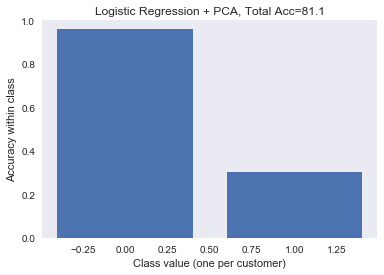

CPU times: user 5.81 s, sys: 611 ms, total: 6.42 s
Wall time: 3.58 s


In [63]:
%%time
# WITH PCA
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)

from sklearn.pipeline import Pipeline
# you can apply the StandardScaler function inside of the cross-validation loop 
#  but this requires the use of PipeLines in scikit. 
#  A pipeline can apply feature pre-processing and data fitting in one compact notation

lr_clf_pipe = Pipeline(
    [('PCA',PCA(n_components=28, svd_solver='randomized')),
     ('CLF', LogisticRegression(penalty='l1', C=0.05, class_weight=None))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X2,y2):
    lr_clf_pipe.fit(X2[train],y2[train])
    y2_hat[test] = lr_clf_pipe.predict(X2[test])
    
# total_accuracy = mt.accuracy_score(y, y_hat)
acc = mt.accuracy_score(y2, y2_hat)
conf = mt.confusion_matrix(y2,y2_hat) # confusion
recall = mt.recall_score(y2, y2_hat)
precision = mt.precision_score(y2, y2_hat)
f = mt.f1_score(y2, y2_hat)

# print ('Pipeline accuracy', total_accuracy)
print ('LR, pipeline accuracy: {0:.4f}%'.format(acc*100)) # print("Accuracy of the model: {0:.4f}%".format(acc*100))
print(conf)
print("LR, pipeline recall : {0:.4f}%".format(recall*100))
print("LR, pipeline Precision: {0:.4f}%".format(precision*100))
print("LR, pipeline F-measure: {0:.4f}%".format(f*100))

# look at the accuracy per class 
plot_class_acc(y2,y2_hat,title="Logistic Regression + PCA")

LR, Accuracy of the model: 81.0967%
[[22304   979]
 [ 4692  2025]]
LR, Recall of the model: 30.1474%
LR, Precision of the model: 67.4101%
LR, F-measure of the model: 41.6624%


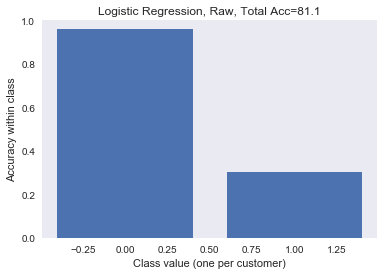

CPU times: user 5.04 s, sys: 163 ms, total: 5.2 s
Wall time: 3.86 s


In [64]:
%%time
# Let's start with a simple classifier and ten fold cross validation, calculating accuracy to start.
start = time.time()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
# here we can setup the object with different learning parameters and constants
lr_task2 = LogisticRegression(penalty='l1', C=0.05, class_weight=None) # get object

# iterate through and get predictions for each row in yhat
for train, test in cv.split(X2,y2):
    lr_task2.fit(X2[train],y2[train])
    y2_hat[test] = lr_task2.predict(X2[test])

# get the metrics   
acc = mt.accuracy_score(y2, y2_hat)
conf = mt.confusion_matrix(y2,y2_hat) # confusion matrix 
recall = mt.recall_score(y2, y2_hat)
precision = mt.precision_score(y2, y2_hat)
f = mt.f1_score(y2, y2_hat)

# Since the return values have 6 sig figures, we format the end results in percentage to have 4 decimal pts. 
print("LR, Accuracy of the model: {0:.4f}%".format(acc*100)) 
print conf
print("LR, Recall of the model: {0:.4f}%".format(recall*100))
print("LR, Precision of the model: {0:.4f}%".format(precision*100))
print("LR, F-measure of the model: {0:.4f}%".format(f*100))

# add metrics to metric lists 
accuracy_task2.append(['LR',acc])
conf_task2.append(['LR',conf])
recall_task2.append(['LR',recall])
precision_task2.append(['LR',precision])
fmeasure_task2.append(['LR',f])

# look at the accuracy per class 
plot_class_acc(y2,y2_hat,title="Logistic Regression, Raw")

The result metrics, including recall, are about the same for LR with and without PCA. We will use the metrics of the without PCA for further analysis. 

<div id='MODEL4' /> 

# Modeling and Evaluation 4

In this section the results of the fitted models for each task will be examined and visualized. 


<a href="#top"> Back to Top </a>

<hr/> 
The result accuracy, recall, precision and f-measure metrics for each classification task can be seen in the table below.


In [65]:
print "\n------------------------------------task 1 metrics ---------------------------------------\n"

print accuracy_task1 
print conf_task1 
print precision_task1 
print recall_task1
print fmeasure_task1 

print "\n------------------------------------task 2 metrics ---------------------------------------\n"

print accuracy_task2
print conf_task2 
print precision_task2 
print recall_task2
print fmeasure_task2 


------------------------------------task 1 metrics ---------------------------------------

[['KNN', 0.80230000000000001], ['RF', 0.81956666666666667], ['LR', 0.80996666666666661]]
[['KNN', array([[21919,  1445],
       [ 4486,  2150]])], ['RF', array([[22218,  1146],
       [ 4267,  2369]])], ['LR', array([[22708,   656],
       [ 5045,  1591]])]]
[['KNN', 0.59805285118219753], ['RF', 0.67396870554765287], ['LR', 0.70805518469069872]]
[['KNN', 0.32399035563592526], ['RF', 0.35699216395418926], ['LR', 0.2397528631705847]]
[['KNN', 0.42029127162545205], ['RF', 0.46675204413358284], ['LR', 0.3582123156591242]]

------------------------------------task 2 metrics ---------------------------------------

[['KNN', 0.80353333333333332], ['RF', 0.81879999999999997], ['LR', 0.81096666666666661]]
[['KNN', array([[21911,  1372],
       [ 4522,  2195]])], ['RF', array([[22597,   686],
       [ 4750,  1967]])], ['LR', array([[22304,   979],
       [ 4692,  2025]])]]
[['KNN', 0.61536305018222592], 

The resultant accuracy, confusing matrix, recall, precision and f-measure metrics for classification task 1 is in the table below


In [66]:
# look at Task 1 metrics and convert it to a dataframe
# put the result to an array: 
arr_task1 = [['KNN','RF','LR'],
[row[1] for row in accuracy_task1],
[row[1] for row in conf_task1],
[row[1] for row in precision_task1],
[row[1] for row in recall_task1],
[row[1] for row in fmeasure_task1]]

# put in a dataframe
df_task1 = pd.DataFrame(arr_task1[1:], columns=['KNN', 'RF','LR'], 
                        index = ['accuracy_task1', 'conf_task1', 'precision_task1 ','recall_task1','fmeasure_task1']) # without index column 
df_task1.index.name='Metrics - Task 1'
df_task1


,KNN,RF,LR
Metrics - Task 1,,,
accuracy_task1,0.8023,0.819567,0.809967
conf_task1,"[[21919, 1445], [4486, 2150]]","[[22218, 1146], [4267, 2369]]","[[22708, 656], [5045, 1591]]"
precision_task1,0.598053,0.673969,0.708055
recall_task1,0.32399,0.356992,0.239753
fmeasure_task1,0.420291,0.466752,0.358212


The resultant accuracy, confusing matrix, recall, precision and f-measure metrics for classification task 2 is in the table below


In [67]:
# look at Task 2 metrics and convert it to a dataframe
# put the result to an array: 
arr_task2 = [['KNN','RF','LR'],
[row[1] for row in accuracy_task2],
[row[1] for row in conf_task2],
[row[1] for row in precision_task2],
[row[1] for row in recall_task2],
[row[1] for row in fmeasure_task2]]

# put in a dataframe
df_task2 = pd.DataFrame(arr_task2[1:], columns=['KNN', 'RF','LR'], 
                        index = ['accuracy_task2', 'conf_task2', 'precision_task2 ','recall_task2','fmeasure_task2']) # without index column 
df_task2.index.name='Metrics - Task 2'
df_task2


,KNN,RF,LR
Metrics - Task 2,,,
accuracy_task2,0.803533,0.8188,0.810967
conf_task2,"[[21911, 1372], [4522, 2195]]","[[22597, 686], [4750, 1967]]","[[22304, 979], [4692, 2025]]"
precision_task2,0.615363,0.741425,0.674101
recall_task2,0.326783,0.292839,0.301474
fmeasure_task2,0.426877,0.419851,0.416624


#### Plot the result metrics of Task 1 

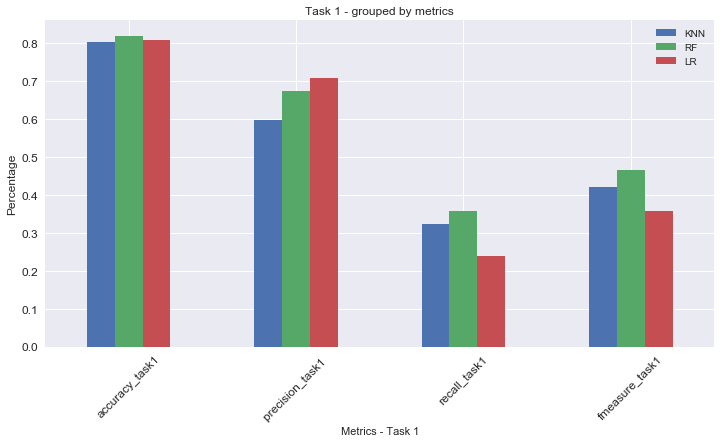

In [68]:
# visualize all result metrics in Task 1 
# drop conf matrix row
df_task1_cp = df_task1.copy()
df_task1_cp.drop(['conf_task1'], inplace=True)

import matplotlib.pyplot as plt
ax = df_task1_cp[['KNN', 'RF','LR']].plot(kind='bar', title ="Task 1 - grouped by metrics", figsize=(12, 6), legend=True, fontsize=12, rot=45)
#ax.set_xlabel(index.name, fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
plt.show() 

This plot shows that for the default classification task 1, the accuracy of each of the three models is about the same, though RF gives slightly better result. <br/> 
The Logistic Regression gives higher precision metric which suggests that it would produce fewer false positives (FP).  <br/> 
The recall is substantially higher for the Random forest models which suggest they would produce fewer false negatives (FN). <br/> 
The collective F-Measure metric is also higher for Random Forest models than for the Logistic Regression model. <br/> 


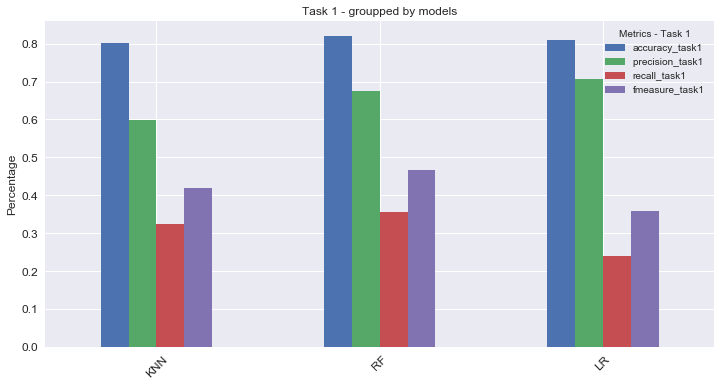

In [69]:
import matplotlib.pyplot as plt
ax = df_task1_cp[['KNN', 'RF','LR']].T.plot(kind='bar', title ="Task 1 - groupped by models", figsize=(12, 6), legend=True, fontsize=12, rot=45)
#ax.set_xlabel(index.name, fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
plt.show() 

For the nature of our data set, which is imbalanced (with only 22% of default =1), and also the nature of the possible purpose of default classification, where it's costly to predict default (=1) when they are not. Recall is very  important for our model, when all else are equal, we want to choose model that give the best recall. 

<hr/> 
Comparing the 3 models, the accuracy of each of the three models is about the same. The Logistic Regression and KNN models have a higher precision metric which suggests it would produce fewer false positives (FP).
However, the collective F-Measure and recall are substantially higher with Random forest (RF) model, which suggest RF would produce fewer false negatives (FN), which is what we prefer for our predictive purpose. 
Overall, the Random Forest model appears to provide the best overall metrics for our analysis purpose of task 1.


#### Plot the result metrics of Task 2

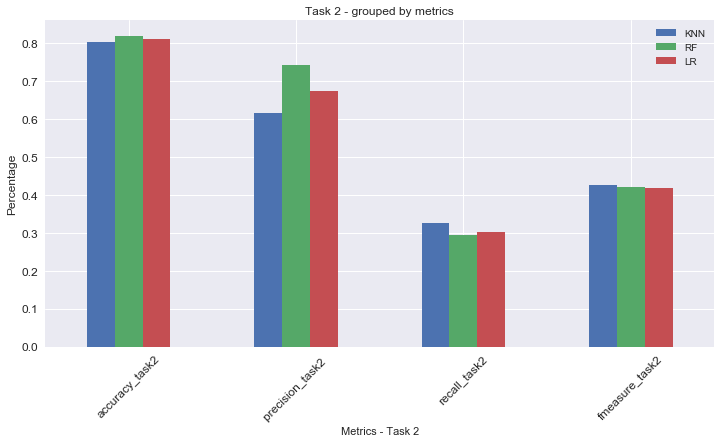

In [70]:
# visualize all result metrics in Task 2
# drop conf matrix row
df_task2_cp = df_task2.copy()
df_task2_cp.drop(['conf_task2'], inplace=True)

import matplotlib.pyplot as plt
ax = df_task2_cp[['KNN', 'RF','LR']].plot(kind='bar', title ="Task 2 - grouped by metrics", figsize=(12, 6), legend=True, fontsize=12, rot=45)
#ax.set_xlabel(index.name, fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
plt.show() 

This plot shows that for the LIMIT_BAL_250k classification task 2, the accuracy of each of the three models is about the same. RF give slightly better accuracy (AC).  <br/>
The collective F-Measure is very similar among the 3 models. <br/>
The RF model gives the highest precision metric which suggests it would produce fewer false positives.  <br/> 
The recall is also similar among all models, where KNN gives a slightly better recall, which suggests it would produce fewer false negatives (FN) compared to RF and LR model. As explained above, for the purpose of classifying credit limit great than 250k, recall is important for that purpose.<br/> 

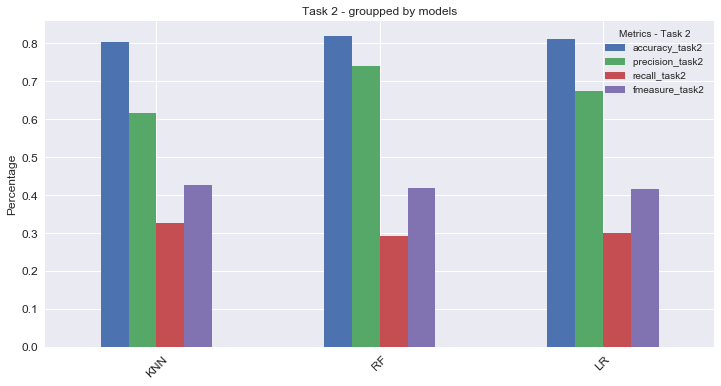

In [71]:
import matplotlib.pyplot as plt
ax = df_task2_cp[['KNN', 'RF','LR']].T.plot(kind='bar', title ="Task 2 - groupped by models", figsize=(12, 6), legend=True, fontsize=12, rot=45)
#ax.set_xlabel(index.name, fontsize=12)
ax.set_ylabel("Percentage", fontsize=12)
plt.show() 

Comparing 3 models, the accuracy of each of the three models is about the same. RF has a higher precision metric which suggests it would produce fewer false positives. The collective F-Measure metric is very similar among the 3 models. The recall is higher for the KNN models which suggest it would produce fewer false negatives. 

Again, because of the nature of our dataset, which is imbalanced (with only 22% of LIMIT_BAL_250k =1), and the purpose of this classification, it's costly to predict default (=1) when they are not, recall is very important for our model. When all else are equal, we want to choose model that give better recall. 

<hr/> 
Comparing all the metrics of the 3 models, for Task 2 classification, it's difficult to identify the clear winner as accuracy, recall and f-measure don't show any significant differences. We will need better methods to conclude which model is the best model for Task 2. We will discuss more about this in the <a href='#MODEL5'> Modeling and Evaluation 5 </a> section. 



<a href='#top'>Back to Top</a>

<div id='MODEL5' /> 

# Modeling and Evaluation 5

In this section the models used in the analysis of tasks one and two will be compared. While accuracy will be one of the primary focuses, metrics related to the cost of estimating incorrectly will also be considered. These include recall, precision and F-Measure.
Ignoring these metrics will result in an increased risk for the bank/credit institutions regardless of the accuracy. 

Higher precision means lower false positives while higher recall means lower false negatives. Precision and accuracy can be combined into the effective F-measure score where higher scores mean lower false negatives and false positives. Sample size can also have an effect on the suitability of the model. Smaller sample sizes can easily result in a model with high bias with low variance due to the lack of equally distributed and representative samples. Large sample sizes provide a better scenario to ensure bias is minimized. The dataset in this analysis has 30000 records which is sufficient. The models were fitted taking into account the high variance present in order to not over fit the model.

For classification task 1 we can see from the above charts that the KNN and Random Forest models would be better for data with smaller false positive rates while the Logistic regression model would be better for larger FPR. Also the accuracies for the models appears to be sufficient close for further examination of confidence intervals to determine if models are equivalent. For classification task 2 the opposite is true. The KNN model would be better for data with smaller FPR while the KNN and Random Forest models would be better for data with larger FPR. The metrics for this model don't appear to be sufficiently close to compare the confidence intervals between the resultant error rates. 

The code below shows the error rates which would need to be compared for task 1. The confidence interval can be calculated using the variance and difference in error rates for each fold.

<a href="#top"> Back to Top </a>

** Accuracy of the dumb model:**

In [72]:
# Dumb model of Task 1: the sample default rate is the same as predicting all zeros (or no defaults)

# calculate the percentage of ones
y.mean() # because y = y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones

#percentage of 0 
1 - y.mean() 

# calculate null accuracy in a single line of code
# Note that this is only for binary classification problems coded as 0 and 1. 
max(y.mean(), 1 - y.mean()) 

0.77879999999999994

In [73]:
# Dumb model of Task 2: the sample default rate is the same as predicting all zeros (or credit limit not greater than 250k)

# calculate the percentage of ones
y2.mean() # because y = y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones

#percentage of 0 
1 - y2.mean() 

# calculate null accuracy in a single line of code
# Note that this is only for binary classification problems coded as 0 and 1. 
max(y2.mean(), 1 - y2.mean()) 

0.77610000000000001

The null accuracy for task 1 classification is 77.9%, this means that a dumb model that always predicts 0 would be right 78% of the time. 

The null accuracy for task 2 classification is 77.6%, this means that a dumb model that always predicts 0 would be right 77.6% of the time

If classification accuracy of our model is close to 77.9, then that model is not a very good model. 
Classification accuracy is the easiest classification metric to understand, but, it does not tell you the underlying distribution of response values, and what "types" of errors are causing the issue.
Since the accuracy of KNN, RF, and LR are very similar, accuracy is not a strong metric to distinguish the performance of each of these model. When comparing the result metrics of accuracy, recall, f-measure, and precision, KNN and RF performed better than LR on all the metrics. Between KNN and RF, KNN has noticeably better precision, but RF has noticeably better recall. 

Therefore, we will use ROC and 95% CI to find out which of our models is the best model, in term of performance. 

<a href="#top">Back to top</a>


## Using the Receiver Operating Characteristic (ROC) Curve to Compare the Performance of the Models: 

Below, we will print out the classification and generate the "scores" from the classifier. The "scores" can be interpreted as the probability that a given class should be designated as positive. These scores are needed so that the ROC can change thresholds deciding if the class is positive or negative. Once we have the scores, we can send each column of scores (i.e., the probability for that class being positive) into the ROC curve generator and it will make use of the arrays of false positives and negatives for that class when the threshold is increased. 

We will save the outputs of each model per task into a dictionary of fpr and tpr (false positive and true positive rates). The keys to the dictionary are the class value. We can also compute the ROC threshold for all the classes by placing their probabilities into one giant vector and whether they should or should not be a value of one. Please note that this method of combining all classes into a single ROC is not considered a standard method--it has limited utility outside classifier comparison. [2]

<a href='#top'>Back to Top</a>

### Classification reports - Task 1

In [74]:
# Logistic Regestion - Task 1
%matplotlib inline
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, roc_curve, auc
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# LR 
# lr_task1 = LogisticRegression(penalty='l1', C=1.0, class_weight=None) # get object

for train, test in cv.split(X,y):
    lr_task1.fit(X[train], y[train])
    y_pred_proba = lr_task1.predict_proba(X[test])[:, 1]
    fpr_lr_task1, tpr_lr_task1, _ = roc_curve(y[test], y_pred_proba)
    y_hat[test] = lr_task1.predict(X[test]) # y_pred is y_hat[test] 

# report 
print('Logistic Regestion - Task 1')
print("Accuracy: %.4f" % accuracy_score(y[test], y_hat[test]))
print("Metrics Accuracy: %.4f" % mt.accuracy_score(y, y_hat)) # .format(acc*100)) 
print(mt.confusion_matrix(y,y_hat))# confusion matrix
print("AUC: %.4f" % roc_auc_score(y[test], y_pred_proba))
print("Metrics AUC: %.4f" % mt.auc(fpr_lr_task1,tpr_lr_task1))
print(classification_report(y[test], y_hat[test]))
    

Logistic Regestion - Task 1
Accuracy: 0.8149
Metrics Accuracy: 0.8100
[[22708   656]
 [ 5045  1591]]
AUC: 0.7336
Metrics AUC: 0.7336
             precision    recall  f1-score   support

          0       0.82      0.98      0.89      2336
          1       0.76      0.24      0.36       663

avg / total       0.81      0.81      0.78      2999



In [75]:
# KNN 
for train, test in cv.split(X,y):
    knn_task1.fit(X[train], y[train])
    y_pred_proba = knn_task1.predict_proba(X[test])[:, 1]
    fpr_knn_task1, tpr_knn_task1, _ = roc_curve(y[test], y_pred_proba)
    y_hat[test] = knn_task1.predict(X[test]) # y_pred is y_hat[test] 

# report
print('KNN - Task 1')
print("Accuracy: %.4f" % accuracy_score(y[test], y_hat[test]))
print("Metrics Accuracy: %.4f" % mt.accuracy_score(y, y_hat)) # .format(acc*100)) 
print(mt.confusion_matrix(y,y_hat))# confusion matrix
print("AUC: %.4f" % roc_auc_score(y[test], y_pred_proba))
print(classification_report(y[test], y_hat[test]))


KNN - Task 1
Accuracy: 0.8063
Metrics Accuracy: 0.8023
[[21919  1445]
 [ 4486  2150]]
AUC: 0.7343
             precision    recall  f1-score   support

          0       0.83      0.94      0.88      2336
          1       0.62      0.32      0.42       663

avg / total       0.78      0.81      0.78      2999



In [76]:
# RF
for train, test in cv.split(X,y):
    rf_task1.fit(X[train], y[train])
    y_pred_proba = rf_task1.predict_proba(X[test])[:, 1]
    fpr_rf_task1, tpr_rf_task1, _ = roc_curve(y[test], y_pred_proba)
    y_hat[test] = rf_task1.predict(X[test]) # y_pred is y_hat[test] 

print("RF - Task 1") 
print("Accuracy: %.4f" % accuracy_score(y[test], y_hat[test]))
print("Metrics Accuracy: %.4f" % mt.accuracy_score(y, y_hat)) # .format(acc*100)) 
print(mt.confusion_matrix(y,y_hat))# confusion matrix
print("AUC: %.4f" % roc_auc_score(y[test], y_pred_proba))
print(classification_report(y[test], y_hat[test]))


RF - Task 1
Accuracy: 0.8229
Metrics Accuracy: 0.8199
[[22220  1144]
 [ 4260  2376]]
AUC: 0.7941
             precision    recall  f1-score   support

          0       0.84      0.96      0.89      2336
          1       0.70      0.35      0.46       663

avg / total       0.81      0.82      0.80      2999



** Comparing the results of all 3 models - Task 1: **

    Metrics Accuracy: RF gave the highest metric accuracy of 81.97% 
    AUC: RF gave the largest area under the curve (AUC) of 79.32% 
    recall for positive: RF gives the highest recall of 35% 
    overall avg / total for both positive and negative: RF has the best overall avg / total with 81% precision, 82% recall, and 80% f1-score 
 
 All 3 models gave better accuracy than the dumb accuracy of 77.9%; however, they are only slightly better. 
 ROC is a standard technique for summarizing classifier performance over a range of tradeoffs between true 
positive and false positive error rates. The Area Under the Curve (AUC) is an accepted performance metric for a ROC curve. Here we see that RF also gave the best AUC compared to the other LR and KNN models. 
 As mentioned above, due to the purpose of our analysis, with the best overall metrics result and AUC, RF is likely the winner for Task 1 classification.

### ROC for Task 1 [24], [25]

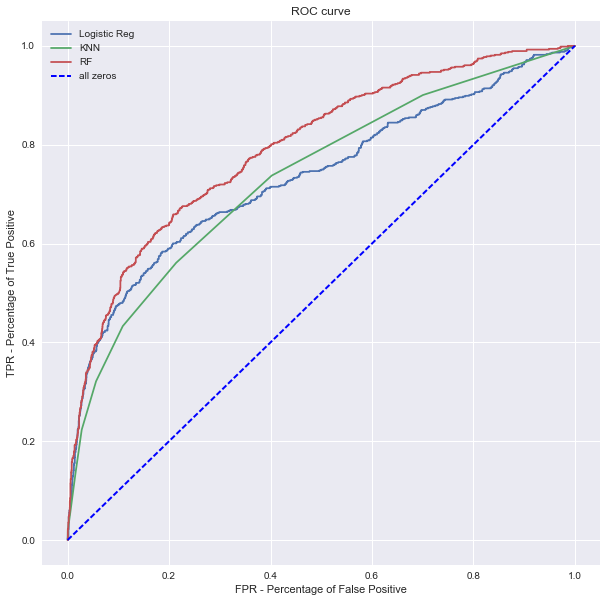

In [77]:
# ROC for Task 1 []
plt.figure(figsize=(10, 10))
plt.plot(fpr_lr_task1, tpr_lr_task1, label='Logistic Reg')
plt.plot(fpr_knn_task1, tpr_knn_task1, label='KNN')
plt.plot(fpr_rf_task1, tpr_rf_task1, label='RF')

## Draw the diagonal line 
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='all zeros') # diagonal line

##Title, label, and legend 
plt.xlabel('FPR - Percentage of False Positive')
plt.ylabel('TPR - Percentage of True Positive')
plt.title('ROC curve')
plt.legend(loc="upper left")
plt.show()


An ROC curve shows several things, first, it shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity), on the other hand, the ROC curve is a threshold measure for the precision/recall. Second, the further the curve to the upper and left borders, the more accurate the test. The closer the curve comes to the diagonal, the less accurate the test. [26] 

Looking at the ROC for Task 1, we can see the performances of the default binary classifier in all 3 models. Since the Random Forest (RF) is more toward the upper left part of the ROC space, suggests that RF is the best model compared to KNN and Logistic Regression (LR). This confirms our analysis above <a href='#MODEL4'> Modeling and Evaluation 4 </a> of the metrics results for Task 1 classification. 


### Classification Reports - Task 2 

In [78]:
# LR - Task 2
for train, test in cv.split(X2,y2):
    lr_task2.fit(X2[train], y2[train])
    y2_pred_proba = lr_task2.predict_proba(X2[test])[:, 1]
    fpr_lr_task2, tpr_lr_task2, _ = roc_curve(y2[test], y2_pred_proba)
    y2_hat[test] = lr_task2.predict(X2[test]) # y_pred is y_hat[test] 

# report 
print("Logistic Regression - Task 2")
print("Accuracy: %.4f" % accuracy_score(y2[test], y2_hat[test]))
print("Metrics Accuracy: %.4f" % mt.accuracy_score(y2, y2_hat)) # .format(acc*100)) 
print(mt.confusion_matrix(y2,y2_hat))# confusion matrix
print("AUC: %.4f" % roc_auc_score(y2[test], y2_pred_proba))
print(classification_report(y2[test], y2_hat[test]))


Logistic Regression - Task 2
Accuracy: 0.8089
Metrics Accuracy: 0.8109
[[22304   979]
 [ 4693  2024]]
AUC: 0.8009
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      2328
          1       0.65      0.32      0.43       671

avg / total       0.79      0.81      0.78      2999



In [79]:
# KNN 
for train, test in cv.split(X2,y2):
    knn_task2.fit(X2[train], y2[train])
    y2_pred_proba = knn_task2.predict_proba(X2[test])[:, 1]
    fpr_knn_task2, tpr_knn_task2, _ = roc_curve(y2[test], y2_pred_proba)
    y2_hat[test] = knn_task2.predict(X2[test]) # y_pred is y_hat[test] 

# report 
print("KNN - Task 2")
print("Accuracy: %.4f" % accuracy_score(y2[test], y2_hat[test]))
print("Metrics Accuracy: %.4f" % mt.accuracy_score(y2, y2_hat)) # .format(acc*100)) 
print(mt.confusion_matrix(y2,y2_hat))# confusion matrix
print("AUC: %.4f" % roc_auc_score(y2[test], y2_pred_proba))
print(classification_report(y2[test], y2_hat[test]))


KNN - Task 2
Accuracy: 0.8009
Metrics Accuracy: 0.8035
[[21911  1372]
 [ 4522  2195]]
AUC: 0.7771
             precision    recall  f1-score   support

          0       0.83      0.93      0.88      2328
          1       0.59      0.35      0.44       671

avg / total       0.78      0.80      0.78      2999



In [80]:
# RF
for train, test in cv.split(X2,y2):
    rf_task2.fit(X2[train], y2[train])
    y2_pred_proba = rf_task2.predict_proba(X2[test])[:, 1]
    fpr_rf_task2, tpr_rf_task2, _ = roc_curve(y2[test], y2_pred_proba)
    y2_hat[test] = rf_task2.predict(X2[test]) # y_pred is y_hat[test] 

# report 
print("RF - Task 2")
print("Accuracy: %.4f" % accuracy_score(y2[test], y2_hat[test]))
print("Metrics Accuracy: %.4f" % mt.accuracy_score(y2, y2_hat)) # .format(acc*100)) 
print(mt.confusion_matrix(y2,y2_hat))# confusion matrix
print("AUC: %.4f" % roc_auc_score(y2[test], y2_pred_proba))
print(classification_report(y2[test], y2_hat[test]))


RF - Task 2
Accuracy: 0.8193
Metrics Accuracy: 0.8183
[[22608   675]
 [ 4776  1941]]
AUC: 0.8325
             precision    recall  f1-score   support

          0       0.83      0.97      0.89      2328
          1       0.72      0.31      0.44       671

avg / total       0.81      0.82      0.79      2999



Comparing the results of all 3 models:

    Metrics Accuracy: RF gave the highest metric accuracy of 82.03% 
    AUC: RF gave the largest area under the curve (AUC) of 83.53% 
    recall for positive: KNN gives the highest recall of 35% 
    overall avg / total for both positive and negative: RF has the best overall avg / total with 81% precision, 82% recall, and 79% f1-score. 

All 3 models gave better accuracy than the dumb accuracy of 77.6%, however, they are only slightly better. 
It's interesting to see that RF gave the best avg / total of precision as well as recall. 
Looking at KNN's precision for positive, it's the lowest with only 59% compared to 65% of the LR and 73% of the RF. 
we mentioned above that due to the purpose of our analysis and the cost of classification, when all else are equal, we prefer the model with the highest recall for positive.
Looking at the AUC, which is an accepted performance metric for a ROC curve, RF gave the best AUC here. 

In conclusion, with the best overall metrics result and AUC, RF is likely the preferred model for Task 2 classification. However, KNN is also a good model
 
<hr/> 
We will look at the ROC for Task 2 classification for a clearer picture of which model is the best for this task. 


### ROC for Task 2 [24], [25]

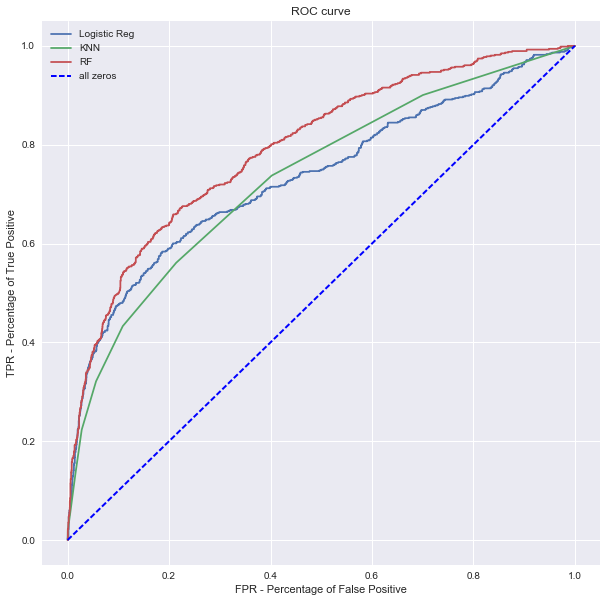

In [81]:
# ROC 
plt.figure(figsize=(10, 10))
plt.plot(fpr_lr_task1, tpr_lr_task1, label='Logistic Reg')
plt.plot(fpr_knn_task1, tpr_knn_task1, label='KNN')
plt.plot(fpr_rf_task1, tpr_rf_task1, label='RF')

## Draw the diagonal line 
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='all zeros') # diagonal line

##Title, label, and legend 
plt.xlabel('FPR - Percentage of False Positive')
plt.ylabel('TPR - Percentage of True Positive')
plt.title('ROC curve')
plt.legend(loc="upper left")
plt.show()

Again, ROC curve shows several things, first, it shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity), on the other hand, the ROC curve is a threshold measure for the precision/recall. Secondly, the further the curve to the upper and left borders, the more accurate the test. The closer the curve comes to the diagonal, the less accurate the test. [26] 

Looking at the ROC for Task 2, we can see the performances of the LIMIT_BAL_250k binary classifier in all 3 models. Since the Random Forest (RF) is further toward the upper left part of the ROC space, suggests that RF is the best overall model compared to KNN and Logistic Regression (LR).

## Statistical Comparison with ANOVA, Post ad-hoc t-test, and Bonferroni correction - Pairwise Tukey's test with alpha=0.05.

### One Way ANOVA with alpha = 0.05 
1-way ANOVA Assumptions: 

    The populations from which our data were obtained must be normally or approximately normally distributed. ==> qualified as we have 30000 data. 
    The samples must be independent ==> qualified as each data line in our data is independent for one another
    The variances of the populations are equal => we will check this criteria 
    The groups must have the same sample size ==> qualified 
 
Hypothesis Testing: 

    - Null hypotheses to be tested: 
    
        for accurary: H01: All the models of default and LIMIT_BAL_250k have equal mean accuracy 
        for AUC: H01: All the models of default and LIMIT_BAL_250k have equal mean AUC

    - The computational aspect involves computing F-statistic for each hypothesis.

alpha = 0.05 

In [82]:
%%time 
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, roc_curve, auc
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# LR 
# lr_task1 = LogisticRegression(penalty='l1', C=1.0, class_weight=None) # get object

lr_accuracy_task1_anova = [] 
lr_conf_task1_anova = [] 
lr_recall_task1_anova = [] 
lr_precision_task1_anova = [] 
lr_fmeasure_task1_anova = [] 
lr_auc_task1_anova = []    

for train, test in cv.split(X,y):
    lr_task1.fit(X[train], y[train])
    y_pred_proba = lr_task1.predict_proba(X[test])[:, 1]
    fpr_lr_task1, tpr_lr_task1, _ = roc_curve(y[test], y_pred_proba)
    y_hat[test] = lr_task1.predict(X[test]) # y_pred is y_hat[test] 
    
    # get the metrics each time: 
    acc = accuracy_score(y[test], y_hat[test])
    conf = mt.confusion_matrix(y[test],y_hat[test]) # confusion matrix 
    recall = mt.recall_score(y[test], y_hat[test])
    precision = mt.precision_score(y[test], y_hat[test])
    f = mt.f1_score(y[test], y_hat[test])
    auc_score = roc_auc_score(y[test], y_pred_proba)
# # test print: 
#     print("KNN, Accuracy of the model: {0:.4f}%".format(acc*100)) 
#     print conf
#     print("KNN, Recall of the model: {0:.4f}%".format(recall*100))
#     print("KNN, Precision of the model: {0:.4f}%".format(precision*100))
#     print("KNN, F-measure of the model: {0:.4f}%".format(f*100))
#     print("KNN, F-measure of the model: {0:.4f}%".format(auc_score*100))

    # add metrics to metric lists 
    lr_accuracy_task1_anova.append(acc)
    lr_conf_task1_anova.append([conf])
    lr_recall_task1_anova.append(recall)
    lr_precision_task1_anova.append(precision)
    lr_fmeasure_task1_anova.append(f)
    lr_auc_task1_anova.append(auc_score)


CPU times: user 9 s, sys: 150 ms, total: 9.15 s
Wall time: 7.6 s


In [83]:
%%time 
#knn - Task 1
knn_accuracy_task1_anova = [] 
knn_conf_task1_anova = [] 
knn_recall_task1_anova = [] 
knn_precision_task1_anova = [] 
knn_fmeasure_task1_anova = [] 
knn_auc_task1_anova = []    

for train, test in cv.split(X,y):
    knn_task1.fit(X[train], y[train])
    y_pred_proba = knn_task1.predict_proba(X[test])[:, 1]
    fpr_knn_task1, tpr_knn_task1, _ = roc_curve(y[test], y_pred_proba)
    y_hat[test] = knn_task1.predict(X[test]) # y_pred is y_hat[test] 
    
    # get the metrics each time: 
    acc = accuracy_score(y[test], y_hat[test])
    conf = mt.confusion_matrix(y[test],y_hat[test]) # confusion matrix 
    recall = mt.recall_score(y[test], y_hat[test])
    precision = mt.precision_score(y[test], y_hat[test])
    f = mt.f1_score(y[test], y_hat[test])
    auc_score = roc_auc_score(y[test], y_pred_proba)

    # add metrics to metric lists 
    knn_accuracy_task1_anova.append(acc)
    knn_conf_task1_anova.append([conf])
    knn_recall_task1_anova.append(recall)
    knn_precision_task1_anova.append(precision)
    knn_fmeasure_task1_anova.append(f)
    knn_auc_task1_anova.append(auc_score)

CPU times: user 2min 7s, sys: 939 ms, total: 2min 8s
Wall time: 2min 10s


In [84]:
%%time 
#rf - Task 1
rf_accuracy_task1_anova = [] 
rf_conf_task1_anova = [] 
rf_recall_task1_anova = [] 
rf_precision_task1_anova = [] 
rf_fmeasure_task1_anova = [] 
rf_auc_task1_anova = []    

for train, test in cv.split(X,y):
    rf_task1.fit(X[train], y[train])
    y_pred_proba = rf_task1.predict_proba(X[test])[:, 1]
    fpr_rf_task1, tpr_rf_task1, _ = roc_curve(y[test], y_pred_proba)
    y_hat[test] = rf_task1.predict(X[test]) # y_pred is y_hat[test] 
    
    # get the metrics each time: 
    acc = accuracy_score(y[test], y_hat[test])
    conf = mt.confusion_matrix(y[test],y_hat[test]) # confusion matrix 
    recall = mt.recall_score(y[test], y_hat[test])
    precision = mt.precision_score(y[test], y_hat[test])
    f = mt.f1_score(y[test], y_hat[test])
    auc_score = roc_auc_score(y[test], y_pred_proba)

    # add metrics to metric lists 
    rf_accuracy_task1_anova.append(acc)
    rf_conf_task1_anova.append([conf])
    rf_recall_task1_anova.append(recall)
    rf_precision_task1_anova.append(precision)
    rf_fmeasure_task1_anova.append(f)
    rf_auc_task1_anova.append(auc_score)

CPU times: user 1min 58s, sys: 2.05 s, total: 2min
Wall time: 43.7 s


**Getting all metrics for Task 2** 

In [85]:
%%time 
# Set up lists to store metrics results
# LR - task 2
lr_accuracy_task2_anova = [] 
lr_conf_task2_anova = [] 
lr_recall_task2_anova = [] 
lr_precision_task2_anova = [] 
lr_fmeasure_task2_anova = [] 
lr_auc_task2_anova = []    

# knn - Task 2
knn_accuracy_task2_anova = [] 
knn_conf_task2_anova = [] 
knn_recall_task2_anova = [] 
knn_precision_task2_anova = [] 
knn_fmeasure_task2_anova = [] 
knn_auc_task2_anova = []    

# rf - Task 2

rf_accuracy_task2_anova = [] 
rf_conf_task2_anova = [] 
rf_recall_task2_anova = [] 
rf_precision_task2_anova = [] 
rf_fmeasure_task2_anova = [] 
rf_auc_task2_anova = []    


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 6.91 µs


In [86]:
%%time 
# LR: 
for train, test in cv.split(X2,y2):
    lr_task2.fit(X2[train], y2[train])
    y2_pred_proba = lr_task2.predict_proba(X2[test])[:, 1]
    fpr_lr_task2, tpr_lr_task2, _ = roc_curve(y2[test], y2_pred_proba)
    y2_hat[test] = lr_task2.predict(X2[test]) # y_pred is y_hat[test] 
    
    # get the metrics each time: 
    acc = accuracy_score(y2[test], y2_hat[test])
    conf = mt.confusion_matrix(y2[test],y2_hat[test]) # confusion matrix 
    recall = mt.recall_score(y2[test], y2_hat[test])
    precision = mt.precision_score(y2[test], y2_hat[test])
    f = mt.f1_score(y2[test], y2_hat[test])
    auc_score = roc_auc_score(y2[test], y2_pred_proba)

    # add metrics to metric lists 
    lr_accuracy_task2_anova.append(acc)
    lr_conf_task2_anova.append([conf])
    lr_recall_task2_anova.append(recall)
    lr_precision_task2_anova.append(precision)
    lr_fmeasure_task2_anova.append(f)
    lr_auc_task2_anova.append(auc_score)


CPU times: user 4.78 s, sys: 132 ms, total: 4.92 s
Wall time: 3.4 s


In [87]:
%%time 
# knn: 
for train, test in cv.split(X2,y2):
    knn_task2.fit(X2[train], y2[train])
    y2_pred_proba = knn_task2.predict_proba(X2[test])[:, 1]
    fpr_lr_task2, tpr_lr_task2, _ = roc_curve(y2[test], y2_pred_proba)
    y2_hat[test] = knn_task2.predict(X2[test]) # y_pred is y_hat[test] 
    
    # get the metrics each time: 
    acc = accuracy_score(y2[test], y2_hat[test])
    conf = mt.confusion_matrix(y2[test],y2_hat[test]) # confusion matrix 
    recall = mt.recall_score(y2[test], y2_hat[test])
    precision = mt.precision_score(y2[test], y2_hat[test])
    f = mt.f1_score(y2[test], y2_hat[test])
    auc_score = roc_auc_score(y2[test], y2_pred_proba)
 
    # add metrics to metric lists 
    knn_accuracy_task2_anova.append(acc)
    knn_conf_task2_anova.append([conf])
    knn_recall_task2_anova.append(recall)
    knn_precision_task2_anova.append(precision)
    knn_fmeasure_task2_anova.append(f)
    knn_auc_task2_anova.append(auc_score)


CPU times: user 2min 18s, sys: 1.47 s, total: 2min 19s
Wall time: 2min 23s


In [88]:
%%time 
# rf
for train, test in cv.split(X2,y2):
    rf_task2.fit(X2[train], y2[train])
    y2_pred_proba = rf_task2.predict_proba(X2[test])[:, 1]
    fpr_lr_task2, tpr_lr_task2, _ = roc_curve(y2[test], y2_pred_proba)
    y2_hat[test] = rf_task2.predict(X2[test]) # y_pred is y_hat[test] 
    
    # get the metrics each time: 
    acc = accuracy_score(y2[test], y2_hat[test])
    conf = mt.confusion_matrix(y2[test],y2_hat[test]) # confusion matrix 
    recall = mt.recall_score(y2[test], y2_hat[test])
    precision = mt.precision_score(y2[test], y2_hat[test])
    f = mt.f1_score(y2[test], y2_hat[test])
    auc_score = roc_auc_score(y2[test], y2_pred_proba)

    # add metrics to metric lists 
    rf_accuracy_task2_anova.append(acc)
    rf_conf_task2_anova.append([conf])
    rf_recall_task2_anova.append(recall)
    rf_precision_task2_anova.append(precision)
    rf_fmeasure_task2_anova.append(f)
    rf_auc_task2_anova.append(auc_score)


CPU times: user 2min, sys: 2.36 s, total: 2min 2s
Wall time: 48.7 s


In [89]:
%%time 

# putting them all to a dataframe of accuracy
dict_acc = {'LR-AC-Task1': lr_accuracy_task1_anova,
            'KNN-AC-Task1': knn_accuracy_task1_anova,
            'RF-AC-Task1': rf_accuracy_task1_anova,
            'LR-AC-Task2': lr_accuracy_task2_anova,
            'KNN-AC-Task2': knn_accuracy_task2_anova,
            'RF-AC-Task2': rf_accuracy_task2_anova,
           }

df_acc = pd.DataFrame(dict_acc)


# putting them all to a dataframe of AUC 

dict_auc = {'LR-AUC-Task1': lr_auc_task1_anova,
            'KNN-AUC-Task1': knn_auc_task1_anova,
            'RF-AUC-Task1': rf_auc_task1_anova,
            'LR-AUC-Task2': lr_auc_task2_anova,
            'KNN-AUC-Task2': knn_auc_task2_anova,
            'RF-AUC-Task2': rf_auc_task2_anova,
           }

df_auc = pd.DataFrame(dict_auc)


print df_acc
print df_auc

   KNN-AC-Task1  KNN-AC-Task2  LR-AC-Task1  LR-AC-Task2  RF-AC-Task1  \
0      0.792069      0.806731     0.802399     0.812729     0.808730   
1      0.797734      0.816728     0.801733     0.816395     0.809730   
2      0.797068      0.803066     0.807731     0.807064     0.811063   
3      0.795735      0.798000     0.804399     0.808667     0.811063   
4      0.798667      0.805667     0.809667     0.812333     0.818000   
5      0.803000      0.802333     0.816667     0.811667     0.828333   
6      0.815605      0.807000     0.823608     0.815333     0.836279   
7      0.809603      0.795599     0.807603     0.805602     0.831944   
8      0.807269      0.799266     0.810937     0.810604     0.824275   
9      0.806269      0.800934     0.814938     0.808936     0.824275   

   RF-AC-Task2  
0     0.822726  
1     0.823059  
2     0.816061  
3     0.810000  
4     0.822333  
5     0.814667  
6     0.823333  
7     0.814938  
8     0.822608  
9     0.820940  
   KNN-AUC-Task1  KN

In [90]:
# check equal variance :
# take a look at the standard deviation of each column
%matplotlib inline
print df_acc.std()

# check equal variance :
# take a look at the standard deviation of each column
%matplotlib inline
print df_auc.std()

KNN-AC-Task1    0.007307
KNN-AC-Task2    0.005973
LR-AC-Task1     0.006859
LR-AC-Task2     0.003457
RF-AC-Task1     0.010047
RF-AC-Task2     0.004736
dtype: float64
KNN-AUC-Task1    0.018263
KNN-AUC-Task2    0.013435
LR-AUC-Task1     0.019026
LR-AUC-Task2     0.012270
RF-AUC-Task1     0.022030
RF-AUC-Task2     0.011824
dtype: float64


### Perform 1-WAY ANOVA:  for mean accurary and mean AUC for all the models

In [91]:
# 1 way ANOVA for mean accuracy 
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1 way ANOVA  for mean accuracy 
stats.f_oneway(df_acc['KNN-AC-Task1'], df_acc['KNN-AC-Task2'], df_acc['LR-AC-Task1'],
               df_acc['LR-AC-Task2'],df_acc['RF-AC-Task1'],df_acc['RF-AC-Task2'])


F_onewayResult(statistic=12.614860726556628, pvalue=3.9432704220433116e-08)

** Test Statistics for mean accuary 1-way ANOVA [35] - [38] ** 


After doing a one-way ANOVA on our models, we received an:
F-statistic = 11.5 and a P-Value < 1.3802865287691154e-07

Statistical Conclusion: 

We reject the Null Hypothesis that there is no difference between the mean accuracy for each model. There is statistically significant evidence to conclude that at least one of the models is different from the others. 

To check which groups differ after getting a positive ANOVA result, we will perform a follow up test or "post-hoc test". Our chosen post-hoc test is to perform a separate t-test for each pair of groups. We will perform a t-test between all pairs using by running each pair through the stats.ttest_ind(). 

We will proceed with a Post-Hoc test to determine which model is different from the others and then conclude which model is the best.


In [92]:
# 1 way ANOVA  for mean AUC
stats.f_oneway(df_auc['KNN-AUC-Task1'], df_auc['KNN-AUC-Task2'], df_auc['LR-AUC-Task1'],
               df_auc['LR-AUC-Task2'],df_auc['RF-AUC-Task1'],df_auc['RF-AUC-Task2'])


F_onewayResult(statistic=69.915734873741414, pvalue=2.3846930683152637e-22)

** Test Statistics for mean AUC 1-way ANOVA [35] - [38] ** 

After doing a one-way ANOVA on our models, we received an:
F-statistic = 70.54 and a P-Value < 1.9358821140308548e-22

Statistical Conclusion: 

We reject the Null Hypothesis that there is no difference between the mean AUC for each model. There is statistically significant evidence to conclude that at least one of the models is different from the others. 

To check which groups differ after getting a positive ANOVA result, we will perform a follow up test or "post-hoc test". Our chosen post-hoc test is to perform a separate t-test for each pair of groups. We will perform a t-test between all pairs using by running each pair through the stats.ttest_ind(). 

We will proceed with a Post-Hoc test to determine which model is different from the others and then conclude which model is the best.

### Post ad-hoc t-test of mean accuracy of each pair

In [93]:
# post ad-hoc t-test for pair wise[38] 

# get all the column names 
all_acc =  np.array(df_acc.columns)

# Get all the pairs 
pairs = []
for r1 in range(5):
    for r2  in range(r1+1,6):
        pairs.append((all_acc[r1], all_acc[r2]))
        
# Conduct t-test on each pair
for r1, r2 in pairs: 
    print(r1, r2)
    print(stats.ttest_ind(df_acc[r1], 
                          df_acc[r2])) 

('KNN-AC-Task1', 'KNN-AC-Task2')
Ttest_indResult(statistic=-0.41229354697782672, pvalue=0.68499305138669397)
('KNN-AC-Task1', 'LR-AC-Task1')
Ttest_indResult(statistic=-2.4190544829031717, pvalue=0.026373624453259761)
('KNN-AC-Task1', 'LR-AC-Task2')
Ttest_indResult(statistic=-3.3766618886766908, pvalue=0.0033607442935721312)
('KNN-AC-Task1', 'RF-AC-Task1')
Ttest_indResult(statistic=-4.5990187761489949, pvalue=0.00022272889070184664)
('KNN-AC-Task1', 'RF-AC-Task2')
Ttest_indResult(statistic=-6.088382052300239, pvalue=9.4087390962343119e-06)
('KNN-AC-Task2', 'LR-AC-Task1')
Ttest_indResult(statistic=-2.2376669923948973, pvalue=0.038127210169770914)
('KNN-AC-Task2', 'LR-AC-Task2')
Ttest_indResult(statistic=-3.3911924147767114, pvalue=0.0032543657998284131)
('KNN-AC-Task2', 'RF-AC-Task1')
Ttest_indResult(statistic=-4.5551547773403387, pvalue=0.00024529681193303046)
('KNN-AC-Task2', 'RF-AC-Task2')
Ttest_indResult(statistic=-6.4441911884669469, pvalue=4.5968419294951819e-06)
('LR-AC-Task1', 'L

The p-values for each pairwise t-test suggest mean of RF model is likely different from the other groups, since the p-values for each t-test involving the RF model vs LR or KNN is well below 0.05. ('RF-AC-Task1', 'RF-AC-Task2') of 0.69 suggest that model perform very similar for both task 1 and task 2 classification. 

Using unadjusted pairwise t-tests can overestimate significance, however, because the more comparisons you make, the more likely you are to come across an unlikely result due to chance. We can adjust for this multiple comparison problem by dividing the statistical significance level by the number of comparisons made. In this case, if we were looking for a significance level of 5%, we'd be looking for p-values of 0.05/10 = 0.005 or less. This simple adjustment for multiple comparisons is known as the Bonferroni correction. [38] 

<hr/> 
The Bonferroni correction is a conservative approach to account for the multiple comparisons problem that may end up rejecting results that are actually significant. Another common post hoc-test is Tukey's test. We will carry out Tukey's test using the pairwise_tukeyhsd() function in the statsmodels.stats.multicomp library. 



### Bonferroni correction - Pairwise Tukey's test with alpha=0.05 for accuracy mean for all models [38]

group1,group2,meandiff,lower,upper,reject
KNN-AC-Task1,KNN-AC-Task2,0.0012,-0.0077,0.0101,False
KNN-AC-Task1,LR-AC-Task1,0.0077,-0.0012,0.0166,False
KNN-AC-Task1,LR-AC-Task2,0.0086,-0.0003,0.0175,False
KNN-AC-Task1,RF-AC-Task1,0.0181,0.0092,0.027,True
KNN-AC-Task1,RF-AC-Task2,0.0168,0.0079,0.0257,True
KNN-AC-Task2,LR-AC-Task1,0.0064,-0.0025,0.0153,False
KNN-AC-Task2,LR-AC-Task2,0.0074,-0.0015,0.0163,False
KNN-AC-Task2,RF-AC-Task1,0.0168,0.008,0.0257,True
KNN-AC-Task2,RF-AC-Task2,0.0155,0.0066,0.0244,True
LR-AC-Task1,LR-AC-Task2,0.001,-0.0079,0.0099,False


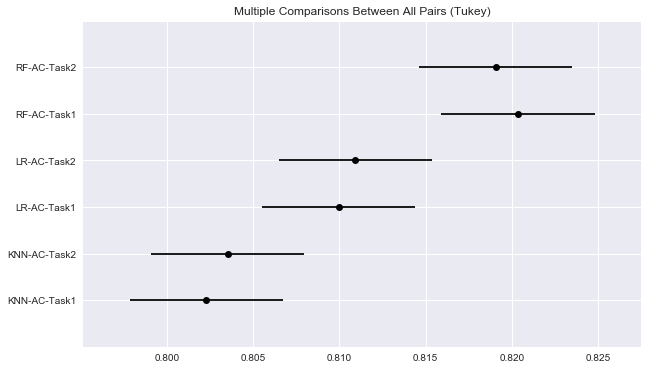

In [94]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# convert the data frame 
df_T = df_acc.T
df_T.set_index(df_acc.columns,inplace=True )

df_T.columns = ['1','2','3', '4', '5', '6', '7','8','9','10']
df_T['Model_ACC'] = df_T.index

df_acc_T = pd.melt(df_T, id_vars=["Model_ACC"], 
                  var_name="acc")
# Tukey's test
tukey = pairwise_tukeyhsd(endog=df_acc_T['value'],     # Data
                          groups=df_acc_T['Model_ACC'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary


    The output of the Tukey test (95% confidence, alpha = 0.05) shows the average difference, a confidence interval as well as whether you should reject the null hypothesis for each pair of groups at the given significance level. The 95% confidence interval plot reinforces the results visually.
    For both Task 1 and Task 2, the mean accuracy of RF is statistically different compared to that of KNN. mean accuracy of KNN and LR are not statistically different. 
    For Task 1 classification: the mean accuracy of RF is statistically different compared to that of KNN and LR 
    For Task 2 classification: the mean accuracy of RF is statistically different compared to that of KNN, but not statistically different compared to LR. 
    Overall, RF still is the best model in term of accuracy. 
    

### Post ad-hoc t-test of mean AUC of each pair

In [95]:
# post ad-hoc t-test for pair wise[38] 

# get all the column names 
all_auc =  np.array(df_auc.columns)

# Get all the pairs 
pairs = []
for r1 in range(5):
    for r2  in range(r1+1,6):
        pairs.append((all_auc[r1], all_auc[r2]))
        
# Conduct t-test on each pair
for r1, r2 in pairs: 
    print(r1, r2)
    print(stats.ttest_ind(df_auc[r1], 
                          df_auc[r2])) 

('KNN-AUC-Task1', 'KNN-AUC-Task2')
Ttest_indResult(statistic=-7.9883063988452871, pvalue=2.5022948426393506e-07)
('KNN-AUC-Task1', 'LR-AUC-Task1')
Ttest_indResult(statistic=-0.34916390720673918, pvalue=0.73101761604959137)
('KNN-AUC-Task1', 'LR-AUC-Task2')
Ttest_indResult(statistic=-12.146266064486642, pvalue=4.1512492448081717e-10)
('KNN-AUC-Task1', 'RF-AUC-Task1')
Ttest_indResult(statistic=-6.277488498638399, pvalue=6.4164340565534369e-06)
('KNN-AUC-Task1', 'RF-AUC-Task2')
Ttest_indResult(statistic=-16.035410368853274, pvalue=4.1976642837039197e-12)
('KNN-AUC-Task2', 'LR-AUC-Task1')
Ttest_indResult(statistic=7.3808130261230671, pvalue=7.5687653493112046e-07)
('KNN-AUC-Task2', 'LR-AUC-Task2')
Ttest_indResult(statistic=-4.7336315843221124, pvalue=0.00016578134336687391)
('KNN-AUC-Task2', 'RF-AUC-Task1')
Ttest_indResult(statistic=0.057501169039286197, pvalue=0.95477949456351452)
('KNN-AUC-Task2', 'RF-AUC-Task2')
Ttest_indResult(statistic=-9.3734968954088345, pvalue=2.3942449052518343e-0

Similarly, the p-values for each pairwise t-test suggest that there is evidence that the mean AUC of RF model is different from the other groups, since the p-values for each t-test involving the RF models vs. LR or KNN is well below 0.001. Most of the pairs have p < 0.05. Only ('KNN-AUC-Task1', 'LR-AUC-Task1'), ('KNN-AUC-Task2', 'RF-AUC-Task1') gave p > 0.05. p > 0.05 of ('KNN-AUC-Task1', 'LR-AUC-Task1') suggests that KNN and LR perform similarly in term of AUC with Task 1 classification. 

Again, using unadjusted pairwise t-tests can overestimate significance, however, because the more comparisons you make, the more likely you are to come across an unlikely result due to chance. We can adjust for this multiple comparison problem by dividing the statistical significance level by the number of comparisons made. In this case, if we were looking for a significance level of 5%, we'd be looking for p-values of 0.05/10 = 0.005 or less. This simple adjustment for multiple comparisons is known as the Bonferroni correction. [38] 

<hr/> 
The Bonferroni correction is a conservative approach to account for the multiple comparisons problem that may end up rejecting results that are actually significant. Another common post hoc-test is Tukey's test. We will carry out Tukey's test using the pairwise_tukeyhsd() function in the statsmodels.stats.multicomp library. 


### Bonferroni correction - Pairwise Tukey's test with alpha=0.05 for AUC mean for all models [38]

group1,group2,meandiff,lower,upper,reject
KNN-AC-Task1,KNN-AC-Task2,0.0573,0.0354,0.0792,True
KNN-AC-Task1,LR-AC-Task1,0.0029,-0.019,0.0248,False
KNN-AC-Task1,LR-AC-Task2,0.0845,0.0626,0.1064,True
KNN-AC-Task1,RF-AC-Task1,0.0568,0.0349,0.0787,True
KNN-AC-Task1,RF-AC-Task2,0.1103,0.0884,0.1322,True
KNN-AC-Task2,LR-AC-Task1,-0.0544,-0.0763,-0.0324,True
KNN-AC-Task2,LR-AC-Task2,0.0272,0.0053,0.0492,True
KNN-AC-Task2,RF-AC-Task1,-0.0005,-0.0224,0.0215,False
KNN-AC-Task2,RF-AC-Task2,0.0531,0.0311,0.075,True
LR-AC-Task1,LR-AC-Task2,0.0816,0.0597,0.1035,True


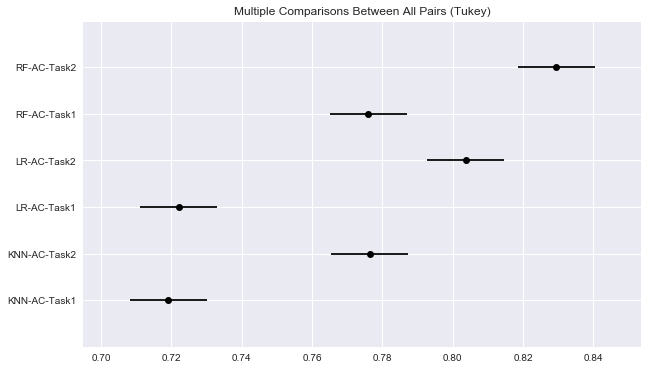

In [96]:
# convert the data frame 
df_auc_T = df_auc.T
df_auc_T.set_index(df_acc.columns,inplace=True )

df_auc_T.columns = ['1','2','3', '4', '5', '6', '7','8','9','10']
df_auc_T['Model_AUC'] = df_auc_T.index

df_auc_T = pd.melt(df_auc_T, id_vars=["Model_AUC"], 
                  var_name="acc")
# df_auc_T

# Tukey's test
tukey = pairwise_tukeyhsd(endog=df_auc_T['value'],     # Data
                          groups=df_auc_T['Model_AUC'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary


    The output of the Tukey test (95% confidence, alpha = 0.05) shows the average difference, a confidence interval as well as whether you should reject the null hypothesis for each pair of groups at the given significance level. The 95% confidence interval plot reinforces the results visually.
    
    For both Task 1 and Task 1, we see more clearly here that RF gives the best AUC and is statically different  compared to KNN and LR. 
    For Task 1 classification: the mean AUC of RF is statically significant compared to KNN and LR, but the mean AUC for KNN and LR is not statistically different. 
    For Task 2 classification: the mean AUC of all RF, KNN, LR are statistically different. 
    
    Overall, RF is the best model in term of AUC.
    


**Final Conclusion on Model Selection:**

Out of 3 models, KNN took the longest to compute (average 75s), Logistic Regression was the fastest (average 2s), Random Forest took an average of 40s to compute. With our data set, which is not excessively large, Random Forest was sufficient and effective. 

Consider all the advantageous, disadvantages of the 3 models, taking the account of the nature of our data set, the purpose of our predictive models for each classification, and with the Random Forest Classifier having the highest accuracy and AUC compared to any other model, and being statistically significantly different, we choose this model as the best model for our dataset.


### Literature Research: 

#### Theoretical Advantages of Random Forest
1. Random Forest is one of the most accurate classifying algorithms. It usually produces a highly accurate classifier.
2. It outputs estimates of the important variables for classification.
3. It has a very effective method of estimating missing data and still maintains good accuracy even if a large proportion of data is missing.
4. It has methods of balancing errors in class populations of unbalanced datasets.
5. It is generally efficient even on large datasets.

#### Theoretical Disadvantages of Random Forest
1. It has a tendency to over fit especially for small datasets (datasets with more features than observations) or datasets with noisy background.
2. For datasets that have categorical variables, Random Forest tends to favor the categories with more levels. It is obvious therefore, that the feature importance score from this method is not very reliable for such a dataset.

#### Theoretical Advantages of KNN
1. KNN Classifier's best attribute is its relative simplicity.
2. Model training is fast, thus not difficult to implement and its intuition is very basic as well.
3. Can be used for classification and regression

#### Theoretical Disadvantages of KNN
1. KNN's greatest drawback is computational inefficiency. The algorithm iterates over every data point, making implementation
   over a large dataset cumbersome.
2. Sensitive to irrelevant features
3. Sensitive to the scale of the data.
3. Accuracy is generally not competitive with the best supervised learning methods

#### Theoretical advantages of Logistic Regression:
1. Highly interpretable (if you remember how)
2. Model training and prediction are fast
3. No tuning is required (excluding regularization)
4. Features don't need scaling
5. Can perform well with a small number of observations
6. Outputs well-calibrated predicted probabilities

#### Theoretical Disadvantages of Logistic Regression
1. Presumes a linear relationship between the features and the log-odds of the response
2. Performance is (generally) not competitive with the best supervised learning methods
3. Can't automatically learn feature interactions

<div id='MODEL6' /> 

# Modeling and Evaluation 6


<hr/> 
## For Logistic Regression
Feature importance for Logistic Regression can be done by analyzing the weight of attributes calculated through the cross_val_score() function as below. 

<a href="#top"> Back to Top </a>

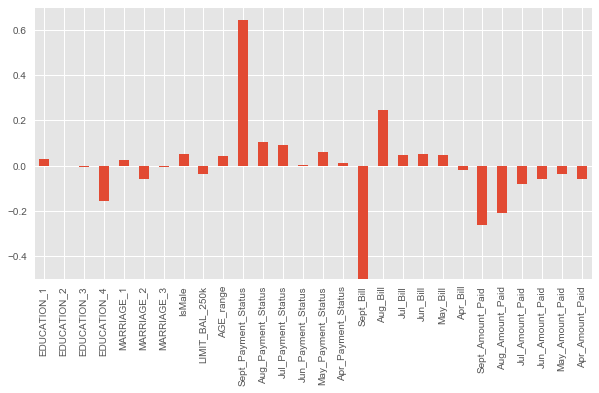

In [97]:
from sklearn.model_selection import cross_val_score
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# LR Task 1:
# lr_task1 = LogisticRegression(penalty='l1', C=0.05, class_weight=None) # get object
accuracies = cross_val_score(lr_task1, X, y=y, cv=cv.split(X,y)) # this also can help with parallelism
weights = lr_task1.coef_.T # take transpose to make a column vector. Note that .coef_ is only available after .fit() is called
variable_names = df_copy1.columns

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(10,5)
weights = pd.Series(lr_task1.coef_[0],index=df_copy1.columns)
weights.plot(kind='bar')
plt.show()


### Important Attributes - Task 1 - LR Model

For classification task 1 we can see that the top heavily weighted attributes are: 

    'Sept_Payment_Status'
    'Sept_Bill'
    'Sept_Amount_Paid'
    'Aug_Amount_Paid'

These weights are what we expected. Monthly bill amount, monthly payment amount and monthly payment status have the highest variability with default. The more recent the months, the higher the weights.
The largest weight is 'Sept_Payment_Status'. Next are 'Sept_Bill' and 'Sept_Amount_Paid', which have negative weights. 
'Sept_Payment_Status' and 'Sept_Bill' have the highest weights, meaning they are the strongest indicators of default. 

Monthly payment status (Apr_Payment_Status -- Sept_Payment_Status) indicates how many months late is the payment, so it makes sense that as this increases the odd of default would also increase. 

Monthly payment amount, ('Apr_Amount_Paid' -- 'Sept_Amount_Paid') also have a negative weighting, meaning as pay amounts decrease during these months, the posibility of default goes higher.

Monthly bill amount (Apr_Bill -- Sept_Bill) indicates the amount billed, and the negative weights suggest that bigger bills tend to default less frequently, while it's opposite for positive correlations. We see that Sept_Bill and Jun_Bill have negative weight, while all the others have positive weights. We know from the Lab1 and MiniLab1 that monthly billing amount variable has multicollinearity, meaning their weights here may not be reliable.

EDUCATION_4 variable is negatively weighted meaning that customers in this group of education are less likely to default. The 'EDUCATION_4' variable represents those of 'missing' education, those with less than high school diploma, and those with higher than graduate level education. In this case, this correlation may not reliable because of the very small population in the data set. As shown above,  EDUCATION_4 only has 468 records out of 30000. Moreover, this variable is made up of customers with very varied education backgrounds. It includes those with 'missing' education information, lower than high school diploma and higher than graduate education. Therefore, any conclusions on the accuracy of this group may be questionable. 

'LIMIT_BAL_250k', is not heavily weighted here. However, as we learned in Lab1 and MiniLab1, 'LIMIT_BAL'- credit limit, has a strong negative weight (only after EDUCAION_4). This means higher credit limits corresponds to lower default status. In reality, it's also true that customers with lower default risk are responsible and should have higher credit limit. So, a negative correlation makes sense here.<br/> 

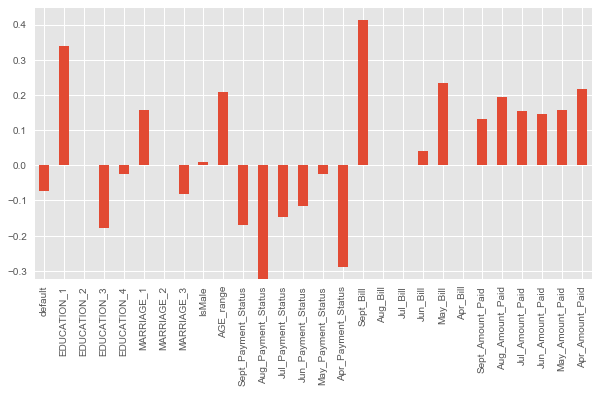

In [98]:
from sklearn.model_selection import cross_val_score
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# LR Task 2:
# lr_task2 = LogisticRegression(penalty='l1', C=0.05, class_weight=None) # get object
accuracies = cross_val_score(lr_task2, X2, y=y2, cv=cv.split(X2,y2)) # this also can help with parallelism
weights = lr_task2.coef_.T # take transpose to make a column vector. Note that .coef_ is only available after .fit() is called
variable_names = df_copy2.columns

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(10,5)
weights = pd.Series(lr_task2.coef_[0],index=df_copy2.columns)
weights.plot(kind='bar')
plt.show()


### Important Attributes - Task 2 - LR Model

For classification task 2 we can see that the top heavily weighted attributes are: 

    'Sept_Bill'
    'EDUCATION_1' 
    'Aug_Payment_Status'
    'Apr_Payment_Status'
    'May_Bill'
    'AGE_range' 
    'May_Bill'

The largest weight is 'Sept_Bill'. Next are 'EDUCATION_1' and 'Aug_Payment_Status', which has negative weight. 
'Sept_Bill' and 'EDUCATION_1' have the highest weights, meaning they are the strongest indicators of having higher than 250k NT credit limit.  

Monthly bill amount (Apr_Bill -- Sept_Bill) indicates the amount billed, and the positive weights suggest that bigger bills the higher the possibility that the credit limit is greater than 250k. However, we know from the Lab1 and MiniLab1 that monthly billing amount variable has multicollinearity, meaning their weights here may not be reliable.

There is a strong positive weight for EDUCATION_1. This positive weight means that customers in this group of education are more  likely to have greater than 250k credit limit. The 'EDUCATION_1' variable represents those with graduate education. This make senses because statistics show that people with graduate level education have higher earning power and are usually more responsible with credit card usage. 

Monthly payment status (Apr_Payment_Status -- Sept_Payment_Status) indicates how many months late is the payment, so it makes sense that as this increases the odd of having greater than 250k NT credit limit would decrease. 

'AGE_range' has a positive weight, meaning high ages increases the possibility of having greater than 250k NT credit limit. 
This makes sense, since people with higher age generally have longer credit history and thus have higher chance of having high credit limit. 

Regards to 'default' - task 1 classification, it has a very small negative weight here.  This means people who are likely to default (default =1) is less likely to have greater than 250k NT credit limit. This again makes sense. In reality, it's also true where people with lower default risk are those responsible and should have higher credit limit and people risk losing their credit limit if they default. So, a negative correlation makes sense here.

The plot also shows that those month billing amount and monthly payment amount are correlated. It's possible to remove these from our model to prevent over fitting.

## For KNN Classification [27] -[29]
Feature importance for KNN can be determined using the k_neighbors function to iterate through a random array of values between -1 and 1.  However, unlike Logistic Regression and Random Forest the weighted values or distances are relevant to the context of the entire forest and not individual attributes. In order to test feature importance, you must iterate through neighboring attributes and permutate through all values to see how performance is affected.

<a href='#top'>Back to Top</a>

### Important Attributes - Task 1 - KNN Model

In [99]:
# Task 1: [27]
test = [[np.random.uniform(-1, 1) for _ in range(len(X[0]))]] 
# knn_task1 = KNeighborsClassifier(n_neighbors=10) #weights='uniform', algorithm='auto', n_jobs=-1
# kneighbors([X, n_neighbors, return_distance]) # Finds the K-neighbors of a point. 
nodes, distances = knn_task1.kneighbors(test)
for d in distances:
    weight = 1.0/d
print(weight) # the 5th and the 7th 

[  4.14576510e-05   1.03734440e-03   8.79584836e-05   5.55740802e-05
   4.16562526e-05   4.18567661e-05   6.80087051e-05   8.16526496e-05
   4.17362270e-05]


For classification task 1 we can see the top important features including keyword attributes, token length, content types and sentiment. It makes sense that these would affect the popularity rating. 

Above are the weights of the 10 nearest neighbors. It is expected that the points that are nearest to our test point have more weight while the points farthest from the test point should weigh less.

In practice, it is expected that for our dataset, the records/ customers that have similarities would be close to each other. If we plotted our dataset to look at the distribution of points, I would expect to see several clusters. This clustering or grouping of data points would be influenced by similarities such as loan payment status, amount of made in recent months and demographics. So, if we were trying to classify a test point, the customers that have similar characteristics would weigh more in its prediction/ classification model. The customers whose characteristics are different from our data point would have less predicting power of the possibility of defaulting on their loan payments.


### Important Attributes - Task 2 - KNN Model

In [100]:
# Task 2: [27]
test = [[np.random.uniform(-1, 1) for _ in range(len(X[0]))]] 
# knn_task2 = KNeighborsClassifier(n_neighbors=10) #weights='uniform', algorithm='auto', n_jobs=-1
# kneighbors([X, n_neighbors, return_distance]) # Finds the K-neighbors of a point.
nodes, distances = knn_task2.kneighbors(test)
for d in distances:
    weight = 1.0/d
print(weight) 

[  1.25454774e-04   9.70120295e-05   6.99105145e-05   1.80995475e-04
   1.63934426e-02   7.68757688e-05   1.29651238e-04   4.79294479e-05
   4.81811612e-05]


For classification task 2 we can again see that the top heavily weighted attributes are around article sensitivity and average_token_length. This is similar to the Logistic Regression model and suggests that weekend publications may be longer and envoke more passionate responses from reviewers.

Above are the weights of the 10 nearest neighbors. It is expected that the points that are nearest to our test point have more weight while the points farthest from the test point should weigh less.

In practice, it is expected that for our dataset, the records/ customers that have similarities would be close to each other. If we plotted our dataset to look at the distribution of points, I would expect to see several clusters. This clustering or grouping of data points would be influenced by similarities such as credit billing amounts, amount of monthly payments and demographics. So, if we were trying to classify a test point, the customers that have similar characteristics would weigh more in its prediction/ classification model. The customers whose characteristics are different from our data point would have less predicting power of the amount of credit limit the test subject has. 

## For Random Forest 

Feature importance for Random Forest models can be calculated directly from the random forest model object. 

<a href='#top'>Back to Top</a>

### Important Attributes - Task 1 - RF Model

[ 0.00485779  0.00449591  0.00392271  0.00160486  0.00468389  0.00477444
  0.00118817  0.00540147  0.0069693   0.01320428  0.23538473  0.10003068
  0.06258844  0.04590455  0.03912164  0.03727965  0.04238626  0.037503
  0.03528574  0.03362151  0.03478548  0.03421035  0.04514105  0.03891007
  0.03370355  0.03179247  0.03067553  0.03057249]


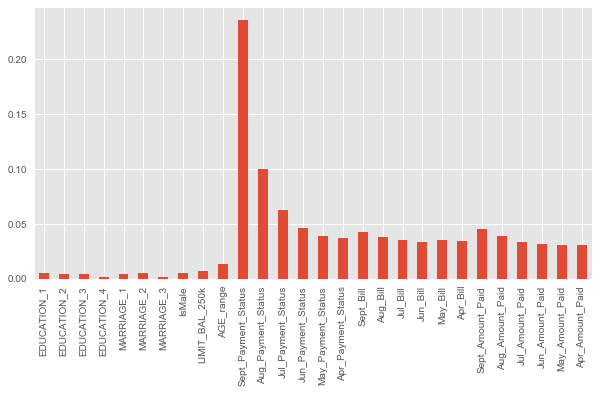

In [101]:
# task 1 RF
from sklearn.model_selection import cross_val_score

print(rf_task1.feature_importances_)
weights = pd.Series(rf_task1.feature_importances_,index=df_copy1.columns) # rf_task1.feature_importances_[:,]
weights.plot(kind='bar')


For classification (task 1), the most important features include 
- Sept_payment_status
- Aug_payment _status
- Jul_payment _status 

We can see that the top important features including monthly bill amount, monthly payment amount and monthly payment status. Monthly payment status have the highest variability with default. The more recent the months, the higher the weights. This can be interpreted as the fact that those customers who have maintained good payment status on their credit are usually more responsible and more likely to have earned more credit from their good credit history. Good payment history means good credit history and so the banks do not view them as high risk. This is why they are afforded higher credit limits. 

The largest and stand out weight is 'Sept_Payment_Status'. Next are 'Aug_Payment_Status' and 'July_Payment_Status. It's interesting to compare with RF model, where monthly amount paid have positive weight, which is opposite to that in this LR model. 

The similar weight pattern of monthly bill amount and monthly payment amount (among the groups, highest Sept_Bill corresponds with the highest Sept_Amount_Paid, the second highest Aug_Bill correspons with the second highest Aug_Amount_Paid, and so on) recognized the relationship of these 2 sets of features. 

Note that random forest models does not need to be normalized. Since the data is being sorted into a collection of trees, a normalization would result in the same output, meaning random forest models are resistant to transformations of the data.

### Important Attributes - Task 2 - RF Model

[ 0.00573194  0.02635582  0.00507719  0.00549406  0.00100023  0.0070428
  0.00508364  0.00046491  0.00582221  0.03271863  0.02574487  0.03722118
  0.03071969  0.0229259   0.01294542  0.01653925  0.10775756  0.07848975
  0.06419388  0.04292525  0.04154275  0.03839753  0.06492852  0.06431577
  0.06730355  0.0539003   0.0538474   0.08150998]


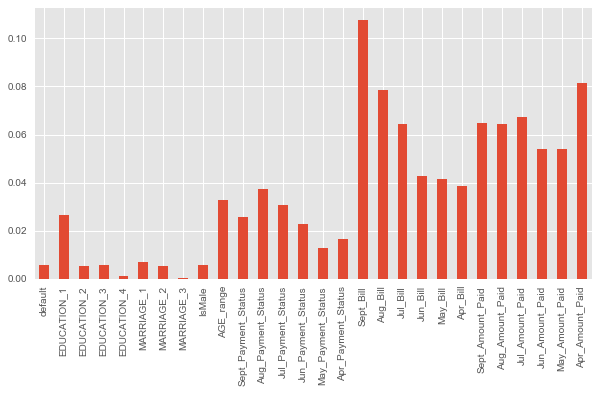

In [102]:
# task 2 RF
from sklearn.model_selection import cross_val_score

print(rf_task2.feature_importances_)
weights = pd.Series(rf_task2.feature_importances_,index=df_copy2.columns) # rf_task1.feature_importances_[:,]
weights.plot(kind='bar')

For classification task 2 we see that the top heavily weighted attributes are monthly bill amount, monthly payment amount and monthly payment status, which have the highest variability with having greater than 250k NT credit limit. 
Monthly amount payment and monthly bill amount have the largest weights. The largest and stand out weight is 'Sept_Bill'. Next are 'Apr_Amount_Paid'.

With RF model, monthly amount paid have positive weight, which is opposite to that in the LR model. Weights of monthly payment status do not seem significant here. 

Note that random forest models does not need to be normalized. Since the data is being sorted into a collection of trees, a normalization would result in the same output, meaning random forest models are resistant to transformations of the data.

<hr/> 
Overall, with all 3 models for both Task 1 and Task 2 classifications, top important features including monthly bill amount, monthly payment amount and monthly payment status. The more recent the months, the higher the weights.


For Task 1, 'Sept_Payment_Status' and 'Sept_Bill' are among the highest weights. <br/> 
For Task 2, monthly bill amount and monthly payment amount are the decisive high weight attributes with 'Sept_Bill'. <br/>  

For both tasks, the similar weight pattern of monthly bill amount and monthly payment amount (among the groups, highest Sept_Bill corresponds with the highest Sept_Amount_Paid, the second highest Aug_Bill correspons with the second highest Aug_Amount_Paid, and so on) recognized the relationship of these 2 sets of features. 

You can see that we also did not normalize our weights for the random forest feature importance graphs. this is becuase random forest models does not need to be normalized. Since the data is being sorted into a collection of trees, a normalization would result in the same output, meaning random forest models are resistant to transformations of the data.

<a href='#top'> Back to Top </a>

<div id='DEP' /> 

# Deployment
The goal of our Task 1 and Task 2 classification models is to create a model that can be used to predict if a person is going to default the next month or to have a greater than 250k credit limit. The model swill be able to identify key features to predict the default possibility and having 250k credit limit possibility. 
For Task 1, a deployment of the model would be able to examine key features and suggest which feature should be improved to reduce or prevent the possibility of default. 
For Task 2, a deployment of the model would be able to examine key features and suggest which feature should be used to improve the possibility of increasing credit limit to higher than 250k NT.  

For Task 1, it is difficult to measure the value of the model for this purpose. One way to measure the value is to implement the model to test in various credit card business. 
This is envisioned as customer advisers calling customers that are going to default to offer help or whatever action the business sees fit to take to avoid that outcome. At the point where the CC company has fewer defaults and people have fewer defaults to struggle with, then you have a valid comparison: old default rate versus new default rate.

For Task 2, deploying credit score/ credit history where they include the total credit limit of a customer will give us the true credit limit of the person. However, this requires a large amount of resources. 

One drawback of creating a model for this purpose is that the data would need to be updated on a frequent basis to tune the model to current trends. A model that predicts credit card default would be popular two years ago may not be useful now, especially when the economy as a whole is in recession. A model that predicts credit limit may need to be updated more often, as credits are very easy to be obtained nowadays, especially in good economy. 

However, updates to the model would be determined by its overall impact to the customer and company. At some point the updates will not significantly improve the prediction at which time the company may decide to just keep it as-is and move the resource to more productive problems that need to be tackled. 

Another feature that may need to be added to improve the prediction of both Task 1 and Task 2 classifications is adding a monthly credit score. 


<a href="#top"> Back to Top </a>

<div id='EX' /> 

# Exceptional Work: Grid Search CV 

<a href="#top"> Back to Top </a>

In [103]:
# get up a function for Grid Search CV. [14] - [17]
# syntax: sklearn.grid_search.GridSearchCV(estimator, param_grid, 
    # loss_func=None, score_func=None, fit_params=None, 
    # n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs'
    
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

def grid_searcher(X, y, model, params, cv_object):
    clf = GridSearchCV(model, params, cv=cv_object,n_jobs=-1)
    clf.fit(X, y)
    return clf 

/Users/heidinguyen/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/heidinguyen/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Grid Search CV for Task 1

In [104]:
# data set for Task 1 
df_copy3 = df_copy.copy()

In [105]:
%%time
# Let's start with a simple classifier and ten fold cross validation, calculating accuracy to start.
start = time.time()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

# create variables we are more familiar with
y3 = df_copy3['default'].values # get the predictor values
del df_copy3['default'] # get rid of the class label
X3 = df_copy3.values # use everything else to predict!

y3_hat = np.zeros(y3.shape) # we will fill this with predictions

scl = StandardScaler()
X3 = scl.fit_transform(X3)

# create cross validation iterator by by performing 10 fold cross validation
cv = StratifiedKFold(n_splits=10, random_state=None) # starting out with random_state=42 so that we will always get the same output the first time we make the split. We want reproducible results.
                     
print(cv)
print cv.get_n_splits(X3,y3)

print 'It took', time.time()-start, 'seconds.'   


StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
10
It took 0.0545179843903 seconds.
CPU times: user 19.6 ms, sys: 13.1 ms, total: 32.7 ms
Wall time: 54.9 ms


In [106]:
# For LR - Task 1 
# syntax: LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, 
# fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None,
# solver=’liblinear’, max_iter=100, multi_class=’ovr’, verbose=0, warm_start=False, n_jobs=1)
# set parameters for grid search to test all the different combinations
c_values = [.001,.1,1,10,100,1000]#np.arange(.01, .1, 0.01) # cost 
model = LogisticRegression()
params = {'penalty':('l1','l2'), 'C':c_values, 'class_weight':(None, 'balanced')}

#run search and return results
# logit_clf = grid_searcher(X3, y3, model, params, cv)
logit_clf = grid_searcher(X3, y3, model, params,10) # n_splits=10, can use: cv.get_n_splits(X3,y3)

#print(clf.grid_scores_ )
print("The best estimator: ",logit_clf.best_estimator_)
print("The best accuracy score is: ", logit_clf.best_score_)
print("The best parameters of model is: ",logit_clf.best_params_)

('The best estimator: ', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))
('The best accuracy score is: ', 0.8099666666666666)
('The best parameters of model is: ', {'penalty': 'l1', 'C': 1, 'class_weight': None})


**Grid search reveals:**

    Penalty - l1 was selected over l2, which means that the objective function that is minimized is better for L1, which is the sum of errors, rather than L2, which is the sum of squared errors. L1 is less sensitive to outliers.
    C=1 value indicates a smaller value is needed to improve the models ability to not fit to noise. This is understandable as the data is normalized data.
    Class_weight selection of None over balanced, means balanced did not add accuracy to the fit, likely because 'balanced' mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data" The best accuracy score is 80.98% is just slightly better accuracy than predicting all non-defaults of 77.9%. 
    Others parameters are recommended as default. 

In [107]:
# for KNN - Task1 
# syntax: KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, 
# leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)[4] 
model = KNeighborsClassifier()
params = { 
    'n_neighbors': np.arange(10)+1 # range will be 1 - 10 instead of 0-10 if using np.arange(11)
}

# call the function: 
knn_clf = grid_searcher(X3, y3, model, params,10) # n_splits=10, can use: cv.get_n_splits(X3,y3)

#print(clf.grid_scores_ )
print("The best estimator: ",knn_clf.best_estimator_)
print("The best accuracy score is: ", knn_clf.best_score_)
print("The best parameters of model is: ",knn_clf.best_params_)


('The best estimator: ', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform'))
('The best accuracy score is: ', 0.8048333333333333)
('The best parameters of model is: ', {'n_neighbors': 10})


**Grid search reveals:**
    
    Best n_neighbors is 10. The best accuracy score is 80.46%. Again, this accuracy is just slightly better than predicting all non-defaults of 77.9% of the dumb model.
    Others parameters are recommended as default. 

In [108]:
# for RF 
# syntax: RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, 
# min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
# max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, 
# random_state=None, verbose=0, warm_start=False, class_weight=None)
model = RandomForestClassifier() # oob_score: (default=False) whether to use out-of-bag samples to estimate the generalization accuracy.
params = { 
    'n_estimators': [10, 50,150],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 30, 50]
}

# call the function:
rfc_clf = grid_searcher(X3, y3, model, params,10) # n_splits=10, can use: cv.get_n_splits(X3,y3)

#print(clf.grid_scores_ )
print("The best estimator: ",rfc_clf.best_estimator_)
print("The best accuracy score is: ", rfc_clf.best_score_)
print("The best parameters of model is: ",rfc_clf.best_params_)


('The best estimator: ', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))
('The best accuracy score is: ', 0.8201333333333334)
('The best parameters of model is: ', {'n_estimators': 150, 'max_depth': 10})


**Grid search reveals:**
    
    Best n_estimators is 150. This makes sense because the higher value of n_estimators returns better model accuracy. However, at certain point, the time efficiency may be too excessive for a very large value of n_estimators. If the data set is large, our regular computer may not be able to handle the task. 
    Best max_depth is 10. This is also reasonable since our data is bias and is relatively small.   
    The best accuracy score is 82.03%. This is a better accuracy than KNN and LR's best accuracies. 
    
    Grid search also recommends 'The min_impurity_split' to be 1e-07, instead of None. 
    Others parameters are recommended as default.

<hr/> 
Overall, for Task 1, Grid Search CV found that with the best parameters for each model, RF is the best model. 
Below is the accuracy of each model:

    - LR: 81.00%
    - KNN: 80.48%
    - RF: 82.01% 
    
 <a href='#top'> Back to Top </a>

## Grid Search CV for Task 2

In [109]:
# data set for Task 2 
df_copy4 = df_copy.copy()


In [110]:
%%time
# Let's start with a simple classifier and ten fold cross validation, calculating accuracy to start.
start = time.time()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt

# create variables we are more familiar with
y4 = df_copy4['LIMIT_BAL_250k'].values # get the predictor values
del df_copy4['LIMIT_BAL_250k'] # get rid of the class label
X4 = df_copy4.values # use everything else to predict!

y4_hat = np.zeros(y4.shape) # we will fill this with predictions

scl = StandardScaler()
X4 = scl.fit_transform(X4)

# create cross validation iterator by by performing 10 fold cross validation
cv = StratifiedKFold(n_splits=10, random_state=None) # starting out with random_state=42 so that we will always get the same output the first time we make the split. We want reproducible results.
                     
print(cv)
print cv.get_n_splits(X4,y4)

print 'It took', time.time()-start, 'seconds.'   


StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
10
It took 0.0369629859924 seconds.
CPU times: user 22.5 ms, sys: 15 ms, total: 37.5 ms
Wall time: 37.3 ms


In [111]:
# For LR - Task 2
# set parameters for grid search to test all the different combinations
c_values = [.001,.1,1,10,100,1000]#np.arange(.01, .1, 0.01) # cost 
model = LogisticRegression()
params = {'penalty':('l1','l2'), 'C':c_values, 'class_weight':(None, 'balanced')}

#run search and return results
# logit_clf = grid_searcher(X3, y3, model, params, cv)
logit_clf = grid_searcher(X4, y4, model, params,10) # n_splits=10, can use: cv.get_n_splits(X3,y3)

#print(clf.grid_scores_ )
print("The best estimator: ",logit_clf.best_estimator_)
print("The best accuracy score is: ", logit_clf.best_score_)
print("The best parameters of model is: ",logit_clf.best_params_)

('The best estimator: ', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))
('The best accuracy score is: ', 0.8108)
('The best parameters of model is: ', {'penalty': 'l1', 'C': 0.1, 'class_weight': None})


** Grid search reveals:**

    Similar to the result for Task 1, best penalty is l1. Class_weight selection of None over balanced means balanced did not add accuracy to the fit, likely because 'balanced' mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. best C is lower at 0.1. This small value indicates a smaller value is needed to improve the models ability to not fit to noise. 
    The best accuracy score is 81.05 % is just slightly better accuracy than predicting all non-defaults of 77.6%.
    Others parameters are recommended as default. 
    

In [112]:
# for KNN - Task 2 
# knn_task2 = KNeighborsClassifier(n_neighbors=10) #weights='uniform', algorithm='auto', n_jobs=-1

model = KNeighborsClassifier()
params = { 
    'n_neighbors': np.arange(10)+1 # range will be 1 - 10 instead of 0-10 if using np.arange(11)
}

# call the function: 
knn_clf = grid_searcher(X4, y4, model, params,10) # n_splits=10, can use: cv.get_n_splits(X3,y3)

#print(clf.grid_scores_ )
print("The best estimator: ",knn_clf.best_estimator_)
print("The best accuracy score is: ", knn_clf.best_score_)
print("The best parameters of model is: ",knn_clf.best_params_)


('The best estimator: ', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform'))
('The best accuracy score is: ', 0.8048)
('The best parameters of model is: ', {'n_neighbors': 10})


**Grid search reveals:**
    
    Similar to the result for Task 1, best n_neighbors is 10. The best accuracy score is 80.60%. Again, this accuracy is just slightly better than predicting all non-defaults of 77.6% of the dumb model.
    Others parameters are recommended as default. 
    

In [113]:
# for RF 
# rf_task1 = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1, oob_score=True) # oob_score: (default=False) whether to use out-of-bag samples to estimate the generalization accuracy.
model = RandomForestClassifier() # oob_score: (default=False) whether to use out-of-bag samples to estimate the generalization accuracy.
params = { 
    'n_estimators': [10, 50, 150],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 30, 50]
}

# call the function:
rfc_clf = grid_searcher(X4, y4, model, params,10) # n_splits=10, can use: cv.get_n_splits(X3,y3)

#print(clf.grid_scores_ )
print("The best estimator: ",rfc_clf.best_estimator_)
print("The best accuracy score is: ", rfc_clf.best_score_)
print("The best parameters of model is: ",rfc_clf.best_params_)

('The best estimator: ', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))
('The best accuracy score is: ', 0.8184666666666667)
('The best parameters of model is: ', {'n_estimators': 150, 'max_depth': 10})


**Grid search reveals:**

    Best n_estimators is 150. This makes sense because the higher value of n_estimators returns better model accuracy. However, at certain point, the time efficiency may be too excessive for a very large value of n_estimators. If the data set is large, our regular computer may not be able to handle the task. 
    Best max_depth is 10. This is also reasonable since our data is bias and is relatively small.   
    The best accuracy score is 81.91%. This is a better accuracy than KNN and LR's best accuracies. 
 
    Grid search also recommends 'The min_impurity_split' to be 1e-07, instead of None. 
    Others parameters are recommended as default.
    
 <hr/> 
 
Overall, for Task 2, Grid Search CV found that with the best parameters for each model, RF is the best model. Below is the accuracy of each model:

- LR:  81.08%
- KNN: 80.48%
- RF: 81.92% 



### Parameters Assessment: 

With our data set, below are parameters that are most significant for making a good model for each classification:  

Logistic Regression: 
   - C - cost
   - class_weight

KNN: 
   - n_neighbors 

RF: 
   - n_estimators
   - max_depth 

We also notice that, there are ranges of each of parameter that are more sentitive to change and result significant metrics result, than other ranges. For example, when we changed the value of C from 0.001 to 0.05, the metrics result changed noticably. But when C > 0.05, the metrics result did not change as much. 

With GridSearchCV(), we found that the best model for both task is RF. With the best combination, LR can outperform KNN. This shows the important of choosing the best parameters for our data set. The models can perform quite differently given different parameter combination. 

GridSearchCV() also returned the same best parameter set for both Task 1 and Task 2. Meaning, the best parameters combination are based on the nature of the data set, not the classification, when using GridSearchCV(). This is a drawback because for our case, we prefer a model with good recall without much trade-off on other metrics. This is something GridSearchCV() cannot tell, we will need to look at the confusion matrix, ROC, AUC, and other methods to find the best model. 


<a href='#top'> Back to Top </a>

<div id='ref'> 
Reference: 

1. https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset 
2. https://github.com/eclarson/DataMiningNotebooks
3. https://pandas.pydata.org/pandas-docs/stable/visualization.html
4. http://scikit-learn.org/stable/auto_examples/covariance/plot_outlier_detection.html
5. https://jmetzen.github.io/2015-01-29/ml_advice.html
6. https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
7. http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
8. https://www.youtube.com/watch?v=E8OQAdQlljE
9. https://stackoverflow.com/questions/21892570/ipython-notebook-align-table-to-the-left-of-cell
10. http://datascience.ibm.com/blog/markdown-for-jupyter-notebooks-cheatsheet/
11. http://www.ritchieng.com/machine-learning-evaluate-classification-model/
12. https://www.quora.com/Machine-Learning/How-does-one-decide-on-which-kernel-to-choose-for-an-SVM-RBF-vs-linear-vs-poly-kernel http://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf
13. http://www.kdnuggets.com/2016/06/select-support-vector-machine-kernels.html
14. https://stackoverflow.com/questions/30102973/how-to-get-best-estimator-on-gridsearchcv-random-forest-classifier-scikit

15. https://chrisalbon.com/machine-learning/cross_validation_parameter_tuning_grid_search.html
16. https://www.openml.org/a/estimation-procedures/1

17. https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/

18. https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0

19. http://bigdata-madesimple.com/k-nearest-neighbors-curse-dimensionality-python-scikit-learn/

20. https://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn
21. https://www3.nd.edu/~dial/publications/chawla2005data.pdf
22. https://machinelearningmastery.com/data-leakage-machine-learning/
23. http://www2.cs.uregina.ca/~dbd/cs831/notes/confusion_matrix/confusion_matrix.html
24. http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py
25. http://enhancedatascience.com/2017/04/23/tutorial-logistic-regression-python/
26. http://gim.unmc.edu/dxtests/roc2.htm
27. http://genomicsclass.github.io/book/pages/crossvalidation.html
28. https://stackoverflow.com/questions/35815992/how-to-find-out-weights-of-attributes-in-k-nearest-neighbors-algorithm
29. https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
30. http://blog.yhat.com/posts/roc-curves.html
31. http://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html#between-groups-variance-and-within-groups-variance-for-a-variable
32. http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html
33. http://blog.yhat.com/posts/logistic-regression-and-python.html
34. https://people.richland.edu/james/lecture/m170/ch13-2wy.html
35. https://stats.stackexchange.com/questions/45851/how-to-statistically-compare-the-performance-of-machine-learning-classifiers
36. http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=21D16E681FF16B0BA91D741A63806A31?doi=10.1.1.29.5194&rep=rep1&type=pdf
37. http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.37.3325&rep=rep1&type=pdf
38. http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html



 <a href="#top">Back to top</a>